In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None  # default='warn'

In [15]:
data_unida=pd.read_csv('dataset_para_modelar.csv')
data_unida=data_unida.iloc[:,1:]
data_unida.shape

(634682, 48)

# **INFORMACIÓN GENERAL DE LOS DATOS**
---

In [16]:
data_unida.head()

cod_persona         mes pais sexo edad      fecha1 xti_empleado  \
0       178103  2015-01-28   ES    H   35  2015-01-12            N   
1       503082  2015-01-28   ES    V   27  2012-08-10            N   
2       502996  2015-01-28   ES    V   37  2012-08-10            N   
3       503053  2015-01-28   ES    H   23  2012-08-10            N   
4       503031  2015-01-28   ES    H   44  2012-08-10            N   

   xti_nuevo_cliente num_antiguedad  xti_rel  ... ind_prod16  ind_prod17  \
0                0.0              6      1.0  ...          0           0   
1                0.0             35      1.0  ...          0           0   
2                0.0             35      1.0  ...          0           0   
3                0.0             35      1.0  ...          0           0   
4                0.0             35      1.0  ...          0           0   

  ind_prod18 ind_prod19 ind_prod20 ind_prod21 ind_prod22  ind_prod23  \
0          0          0          0          0        0.0         0.0   
1          0          0          0          0        0.0         0.0   
2          0          0          0          0        0.0         0.0   
3          0          0          0          0        0.0         0.0   
4          0          0          0          0        0.0         0.0   

   ind_prod24  ind_prod25  
0           0           0  
1           0           0  
2           0           0  
3           1           0  
4           0           0  

[5 rows x 48 columns]

In [17]:
data_unida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634682 entries, 0 to 634681
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   cod_persona            634682 non-null  int64  
 1   mes                    634682 non-null  object 
 2   pais                   634626 non-null  object 
 3   sexo                   634617 non-null  object 
 4   edad                   634682 non-null  object 
 5   fecha1                 634626 non-null  object 
 6   xti_empleado           634626 non-null  object 
 7   xti_nuevo_cliente      634626 non-null  float64
 8   num_antiguedad         634682 non-null  object 
 9   xti_rel                634626 non-null  float64
 10  fec_ult_cli_1t         36 non-null      object 
 11  xti_rel_1mes           629040 non-null  float64
 12  tip_rel_1mes           629040 non-null  object 
 13  indresi                634626 non-null  object 
 14  indext                 634626 non-nu

# **VALORES NULOS**
---

In [18]:
data_unida.isna().sum() #/ len(data_unida)

cod_persona                   0
mes                           0
pais                         56
sexo                         65
edad                          0
fecha1                       56
xti_empleado                 56
xti_nuevo_cliente            56
num_antiguedad                0
xti_rel                      56
fec_ult_cli_1t           634646
xti_rel_1mes               5642
tip_rel_1mes               5642
indresi                      56
indext                       56
des_canal                  7178
xti_extra                    56
tip_dom                      56
cod_provincia              2946
xti_actividad_cliente        56
imp_renta                124164
id_segmento                7403
mean_engagement            5642
ind_prod1                     0
ind_prod2                     0
ind_prod3                     0
ind_prod4                     0
ind_prod5                     0
ind_prod6                     0
ind_prod7                     0
ind_prod8                     0
ind_prod

# **ANÁLISIS DESCRIPTIVO DE VARIABLES NUMÉRICAS**
---

In [19]:
#Primera mitad del dataset
data_unida.iloc[:,:round(data_unida.shape[1]/2)].describe()

cod_persona  xti_nuevo_cliente        xti_rel   xti_rel_1mes  \
count  6.346820e+05      634626.000000  634626.000000  629040.000000   
mean   7.217769e+05           0.059846       1.005559       1.000587   
std    4.290892e+05           0.237202       0.738085       0.036560   
min    5.514000e+03           0.000000       1.000000       0.000000   
25%    3.584120e+05           0.000000       1.000000       1.000000   
50%    6.230450e+05           0.000000       1.000000       1.000000   
75%    1.102693e+06           0.000000       1.000000       1.000000   
max    1.537800e+06           1.000000      99.000000       4.000000   

        tip_dom  cod_provincia  xti_actividad_cliente     imp_renta  \
count  634626.0  631736.000000          634626.000000  5.105180e+05   
mean        1.0      26.598741               0.459126  1.367071e+05   
std         0.0      12.777667               0.498327  3.339545e+05   
min         1.0       1.000000               0.000000  4.559550e+03   
25%         1.0      15.000000               0.000000  6.821148e+04   
50%         1.0      28.000000               0.000000  1.012905e+05   
75%         1.0      35.000000               1.000000  1.566742e+05   
max         1.0      52.000000               1.000000  2.889440e+07   

       mean_engagement      ind_prod1  
count    629040.000000  634682.000000  
mean          6.425623       0.000101  
std           1.345879       0.010041  
min           0.218520       0.000000  
25%           5.117500       0.000000  
50%           6.463518       0.000000  
75%           7.359949       0.000000  
max          38.793123       1.000000

In [20]:
#Segunda mitad del dataset
data_unida.iloc[:,round(data_unida.shape[1]/2):].describe()

ind_prod2      ind_prod3      ind_prod4      ind_prod5      ind_prod6  \
count   634682.0  634682.000000  634682.000000  634682.000000  634682.000000   
mean         0.0       0.660945       0.000495       0.081740       0.009992   
std          0.0       0.473389       0.022237       0.273969       0.099461   
min          0.0       0.000000       0.000000       0.000000       0.000000   
25%          0.0       0.000000       0.000000       0.000000       0.000000   
50%          0.0       1.000000       0.000000       0.000000       0.000000   
75%          0.0       1.000000       0.000000       0.000000       0.000000   
max          0.0       1.000000       1.000000       1.000000       1.000000   

           ind_prod7      ind_prod8      ind_prod9     ind_prod10  \
count  634682.000000  634682.000000  634682.000000  634682.000000   
mean        0.009825       0.131909       0.043504       0.002036   
std         0.098635       0.338392       0.203988       0.045072   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          ind_prod11  ...     ind_prod16     ind_prod17     ind_prod18  \
count  634682.000000  ...  634682.000000  634682.000000  634682.000000   
mean        0.001899  ...       0.009263       0.002718       0.053576   
std         0.043531  ...       0.095797       0.052063       0.225180   
min         0.000000  ...       0.000000       0.000000       0.000000   
25%         0.000000  ...       0.000000       0.000000       0.000000   
50%         0.000000  ...       0.000000       0.000000       0.000000   
75%         0.000000  ...       0.000000       0.000000       0.000000   
max         1.000000  ...       1.000000       1.000000       1.000000   

          ind_prod19     ind_prod20     ind_prod21     ind_prod22  \
count  634682.000000  634682.000000  634682.000000  634651.000000   
mean        0.045505       0.026503       0.003756       0.055561   
std         0.208408       0.160626       0.061173       0.229073   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          ind_prod23     ind_prod24     ind_prod25  
count  634651.000000  634682.000000  634682.000000  
mean        0.060295       0.128827       0.065876  
std         0.238032       0.335008       0.248065  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000  

[8 rows x 24 columns]

## Variables numéricas

In [21]:
continuas = []
for c in data_unida.columns:
    t = str(data_unida[c].dtype)
    if ("int" in t or "float" in t):
        continuas.append(c)
continuas

['cod_persona',
 'xti_nuevo_cliente',
 'xti_rel',
 'xti_rel_1mes',
 'tip_dom',
 'cod_provincia',
 'xti_actividad_cliente',
 'imp_renta',
 'mean_engagement',
 'ind_prod1',
 'ind_prod2',
 'ind_prod3',
 'ind_prod4',
 'ind_prod5',
 'ind_prod6',
 'ind_prod7',
 'ind_prod8',
 'ind_prod9',
 'ind_prod10',
 'ind_prod11',
 'ind_prod12',
 'ind_prod13',
 'ind_prod14',
 'ind_prod15',
 'ind_prod16',
 'ind_prod17',
 'ind_prod18',
 'ind_prod19',
 'ind_prod20',
 'ind_prod21',
 'ind_prod22',
 'ind_prod23',
 'ind_prod24',
 'ind_prod25']

Visualizacion de diagramas de cajas

-------------------------- Análisis de la variable:  cod_persona
Porcentaje de nulos;  0.0
Media de la variable:  721776.9364138262
Mediana de la variable:  623045.0
Percentil 25 de la variable:  358412.0
Percentil 75 de la variable:  1102693.0


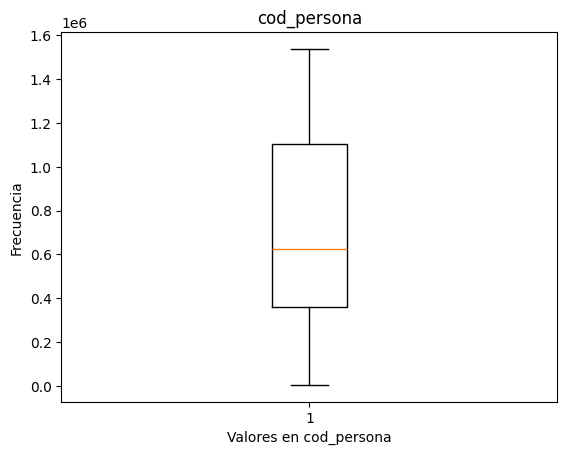

-------------------------- Análisis de la variable:  xti_nuevo_cliente
Porcentaje de nulos;  0.008953267143108382
Media de la variable:  0.05984627166236492
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


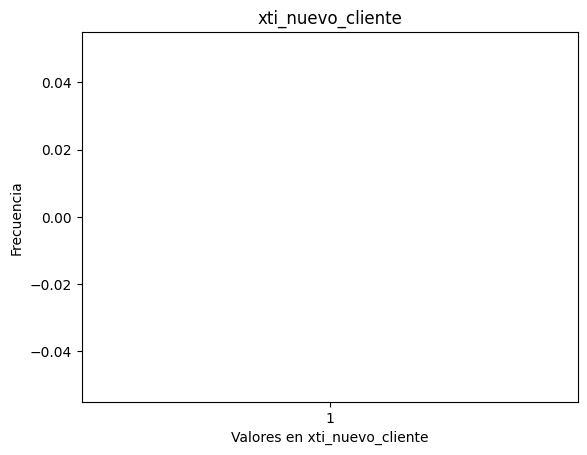

-------------------------- Análisis de la variable:  xti_rel
Porcentaje de nulos;  0.008953267143108382
Media de la variable:  1.005559179737357
Mediana de la variable:  1.0
Percentil 25 de la variable:  1.0
Percentil 75 de la variable:  1.0


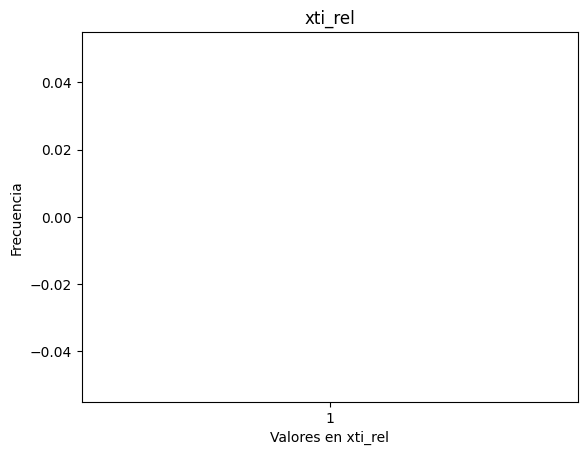

-------------------------- Análisis de la variable:  xti_rel_1mes
Porcentaje de nulos;  0.9020416646681696
Media de la variable:  1.0005866081648225
Mediana de la variable:  1.0
Percentil 25 de la variable:  1.0
Percentil 75 de la variable:  1.0


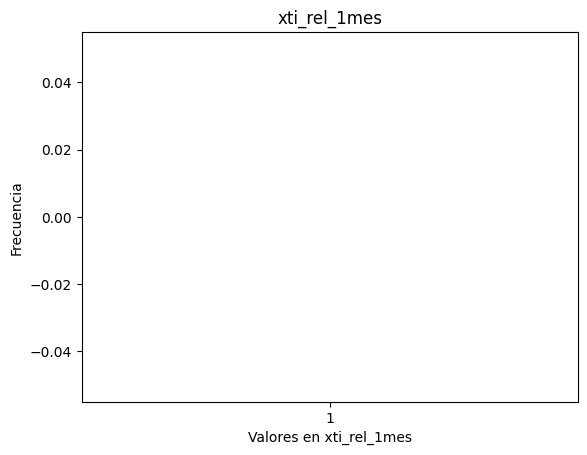

-------------------------- Análisis de la variable:  tip_dom
Porcentaje de nulos;  0.008953267143108382
Media de la variable:  1.0
Mediana de la variable:  1.0
Percentil 25 de la variable:  1.0
Percentil 75 de la variable:  1.0


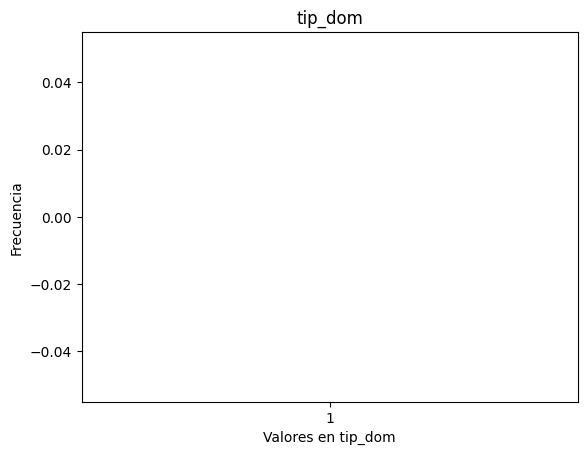

-------------------------- Análisis de la variable:  cod_provincia
Porcentaje de nulos;  0.47100580363566596
Media de la variable:  26.598740613167525
Mediana de la variable:  28.0
Percentil 25 de la variable:  15.0
Percentil 75 de la variable:  35.0


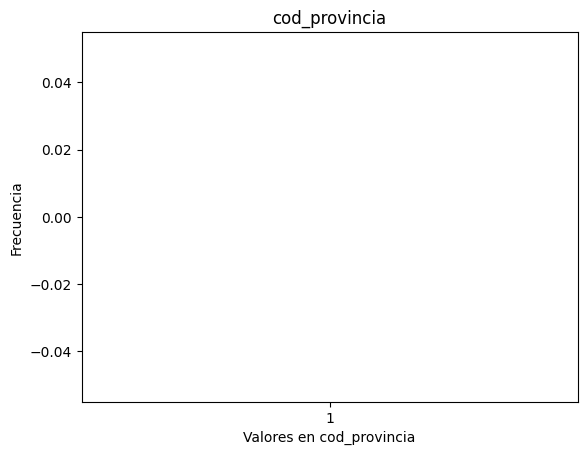

-------------------------- Análisis de la variable:  xti_actividad_cliente
Porcentaje de nulos;  0.008953267143108382
Media de la variable:  0.4591255322032189
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  1.0


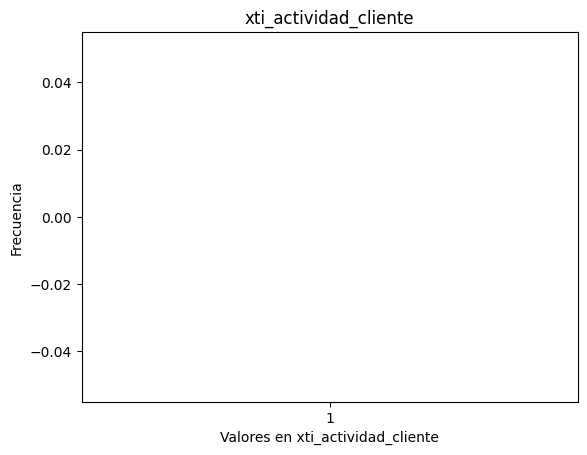

-------------------------- Análisis de la variable:  imp_renta
Porcentaje de nulos;  19.851311813516237
Media de la variable:  136707.09407315703
Mediana de la variable:  101290.515
Percentil 25 de la variable:  68211.48
Percentil 75 de la variable:  156674.16


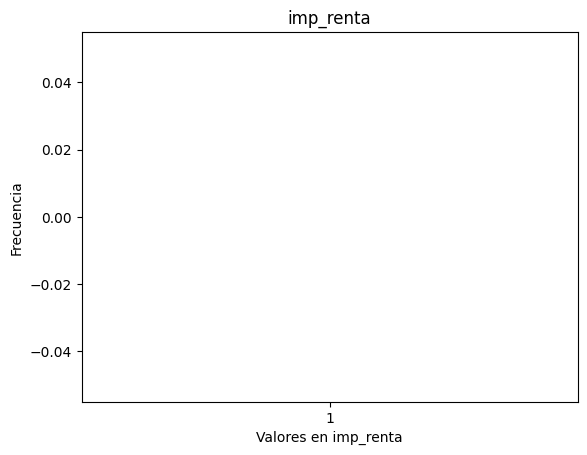

-------------------------- Análisis de la variable:  mean_engagement
Porcentaje de nulos;  0.9020416646681696
Media de la variable:  6.425623484218865
Mediana de la variable:  6.463518112854217
Percentil 25 de la variable:  5.117499600033625
Percentil 75 de la variable:  7.359948543002247


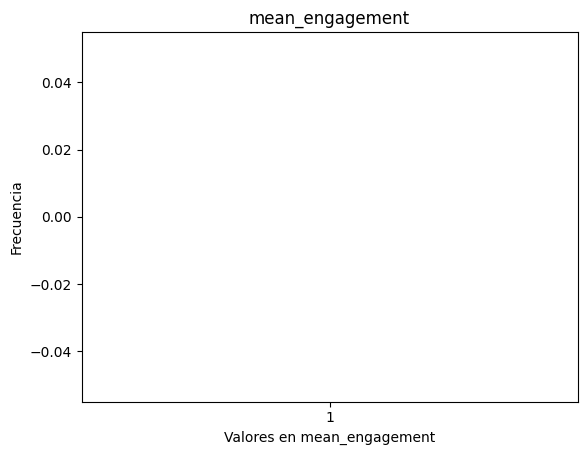

-------------------------- Análisis de la variable:  ind_prod1
Porcentaje de nulos;  0.0
Media de la variable:  0.00010083789992468669
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


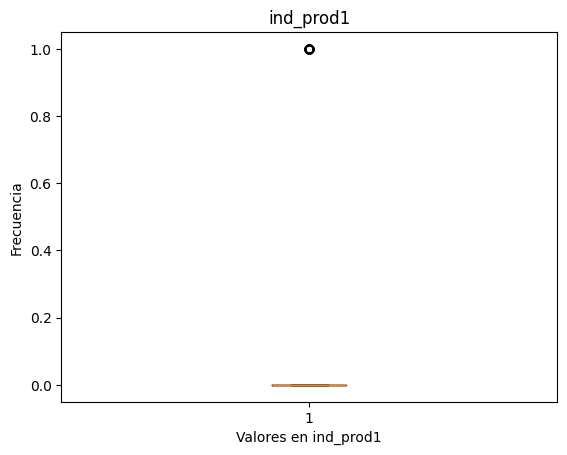

-------------------------- Análisis de la variable:  ind_prod2
Porcentaje de nulos;  0.0
Media de la variable:  0.0
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


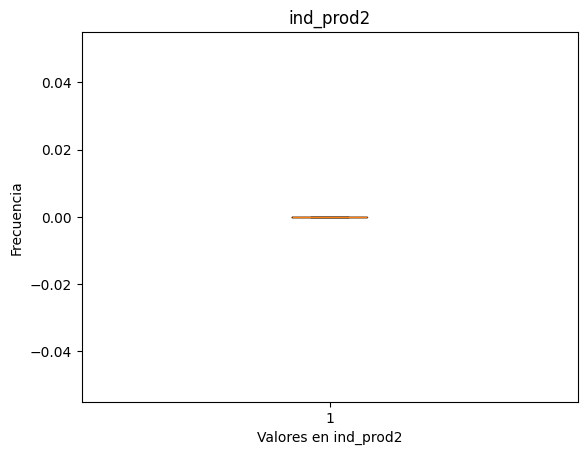

-------------------------- Análisis de la variable:  ind_prod3
Porcentaje de nulos;  0.0
Media de la variable:  0.6609451662407316
Mediana de la variable:  1.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  1.0


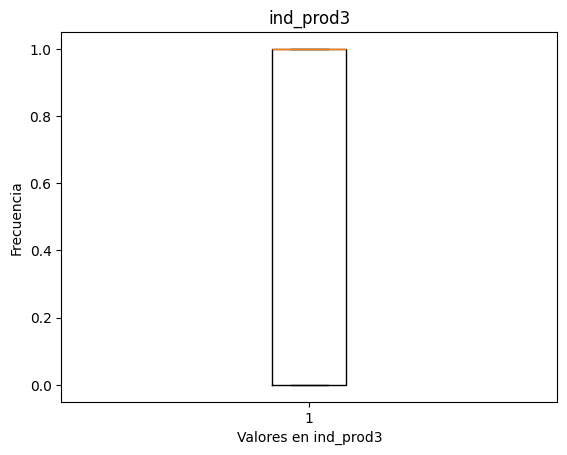

-------------------------- Análisis de la variable:  ind_prod4
Porcentaje de nulos;  0.0
Media de la variable:  0.000494735946505494
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


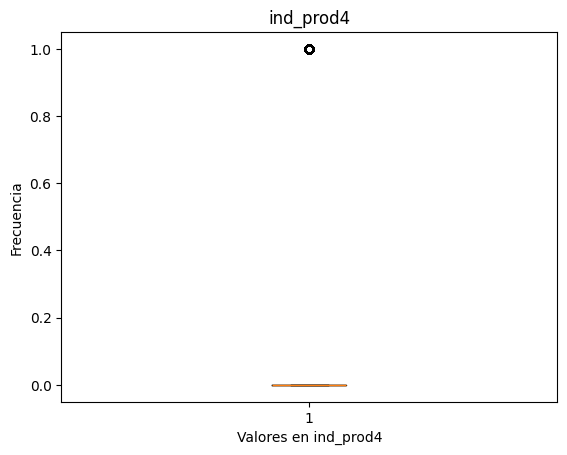

-------------------------- Análisis de la variable:  ind_prod5
Porcentaje de nulos;  0.0
Media de la variable:  0.08174014703426283
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


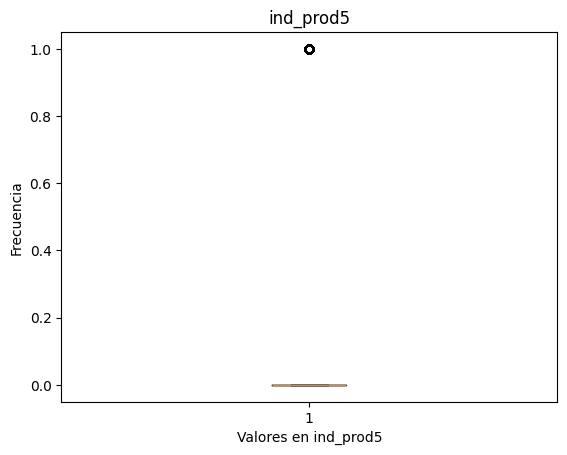

-------------------------- Análisis de la variable:  ind_prod6
Porcentaje de nulos;  0.0
Media de la variable:  0.009992405645661923
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


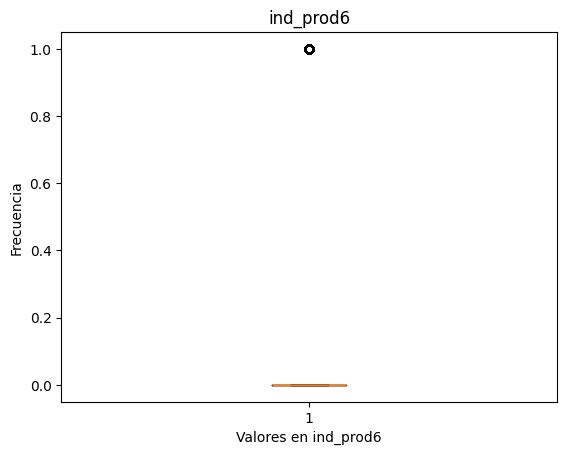

-------------------------- Análisis de la variable:  ind_prod7
Porcentaje de nulos;  0.0
Media de la variable:  0.00982539287391166
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


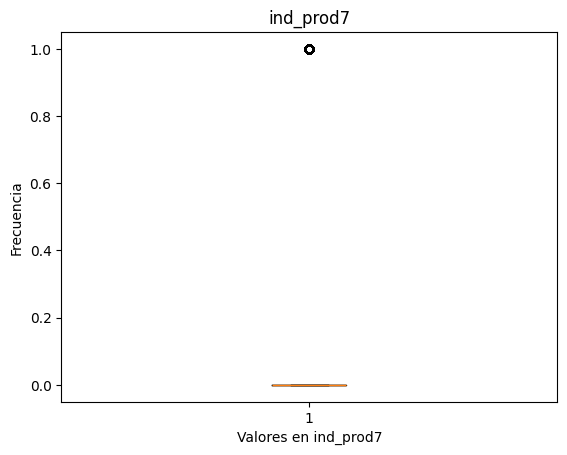

-------------------------- Análisis de la variable:  ind_prod8
Porcentaje de nulos;  0.0
Media de la variable:  0.13190857783898077
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


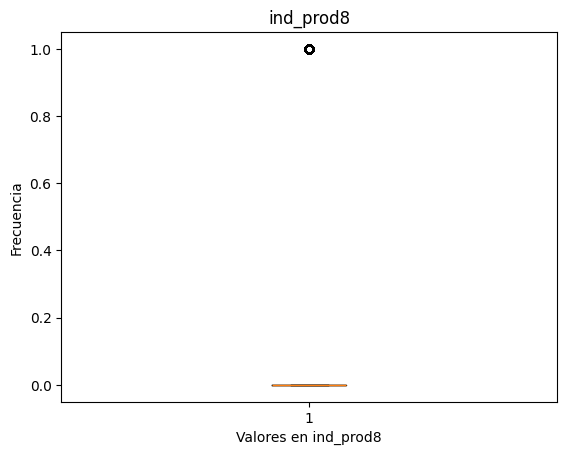

-------------------------- Análisis de la variable:  ind_prod9
Porcentaje de nulos;  0.0
Media de la variable:  0.043503675856570695
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


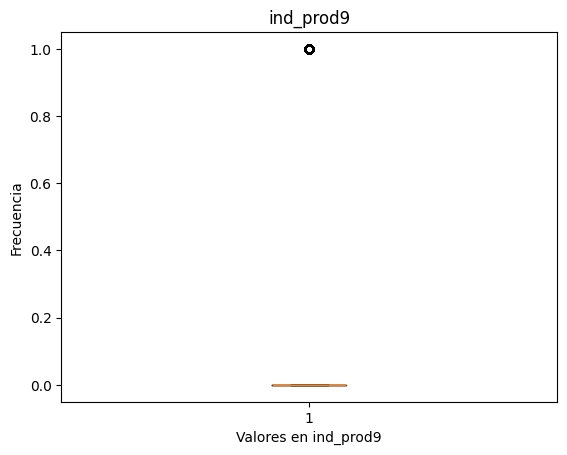

-------------------------- Análisis de la variable:  ind_prod10
Porcentaje de nulos;  0.0
Media de la variable:  0.0020356651047296124
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


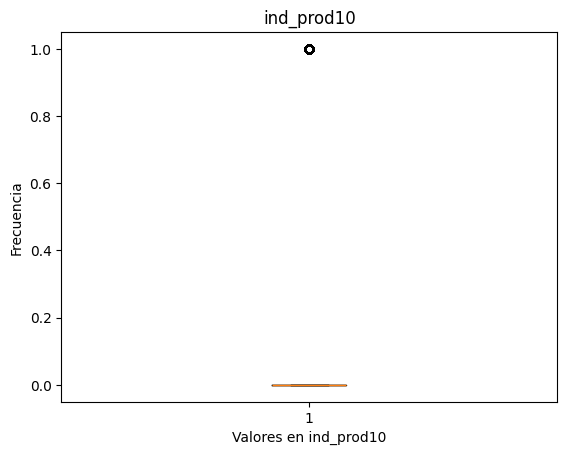

-------------------------- Análisis de la variable:  ind_prod11
Porcentaje de nulos;  0.0
Media de la variable:  0.0018985885845194917
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


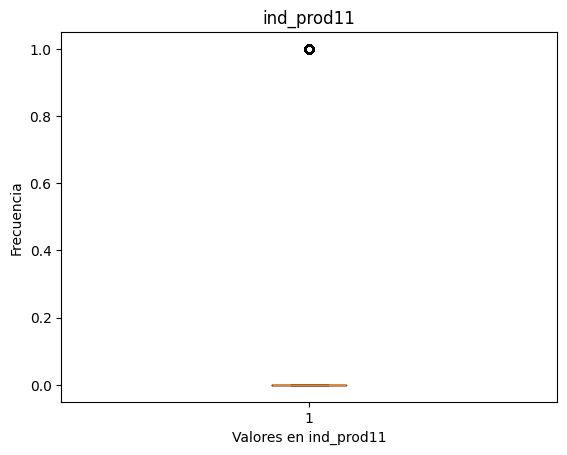

-------------------------- Análisis de la variable:  ind_prod12
Porcentaje de nulos;  0.0
Media de la variable:  0.043437500984745116
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


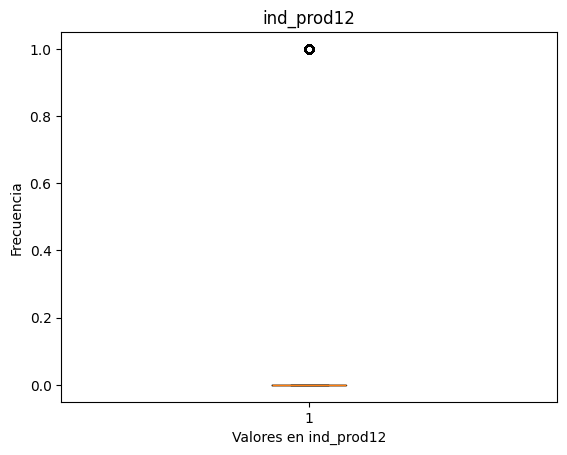

-------------------------- Análisis de la variable:  ind_prod13
Porcentaje de nulos;  0.0
Media de la variable:  0.08313927289571786
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


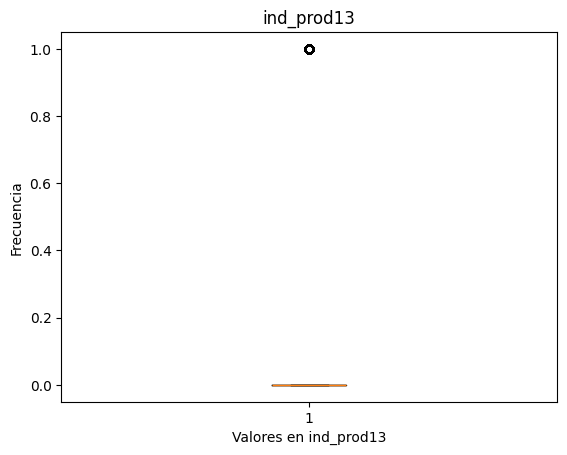

-------------------------- Análisis de la variable:  ind_prod14
Porcentaje de nulos;  0.0
Media de la variable:  0.018697552475097766
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


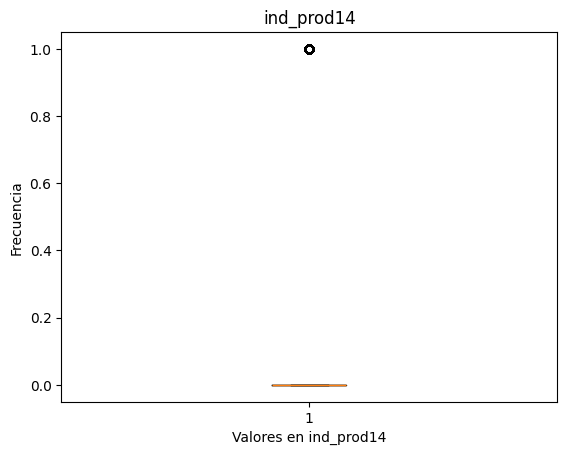

-------------------------- Análisis de la variable:  ind_prod15
Porcentaje de nulos;  0.0
Media de la variable:  0.005275082639810172
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


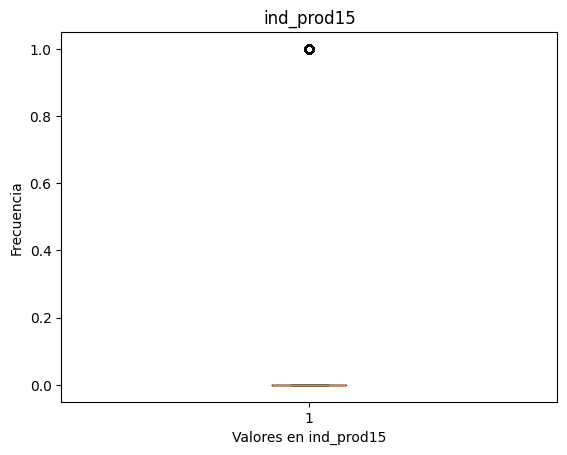

-------------------------- Análisis de la variable:  ind_prod16
Porcentaje de nulos;  0.0
Media de la variable:  0.009262906463394267
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


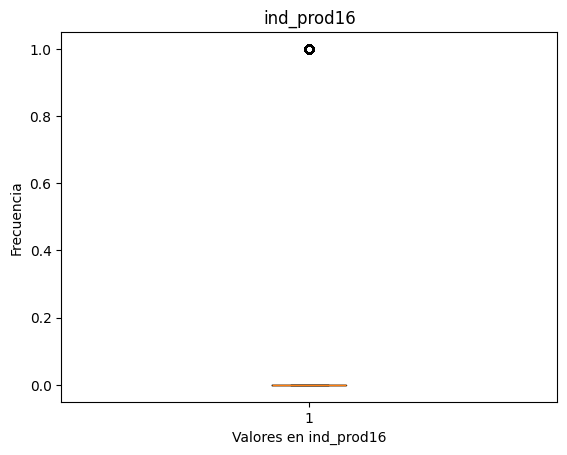

-------------------------- Análisis de la variable:  ind_prod17
Porcentaje de nulos;  0.0
Media de la variable:  0.0027178965214075712
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


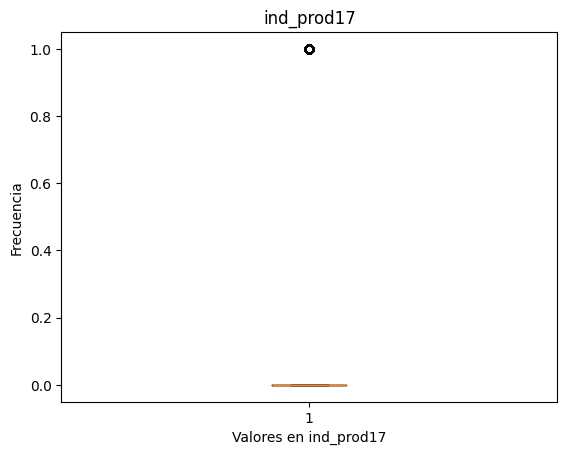

-------------------------- Análisis de la variable:  ind_prod18
Porcentaje de nulos;  0.0
Media de la variable:  0.053576436703735096
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


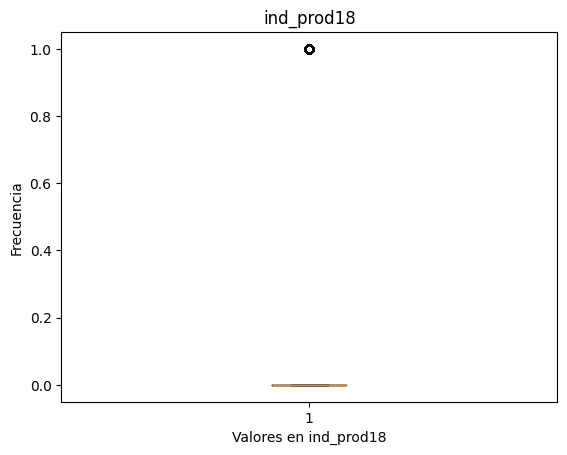

-------------------------- Análisis de la variable:  ind_prod19
Porcentaje de nulos;  0.0
Media de la variable:  0.04550467793320119
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


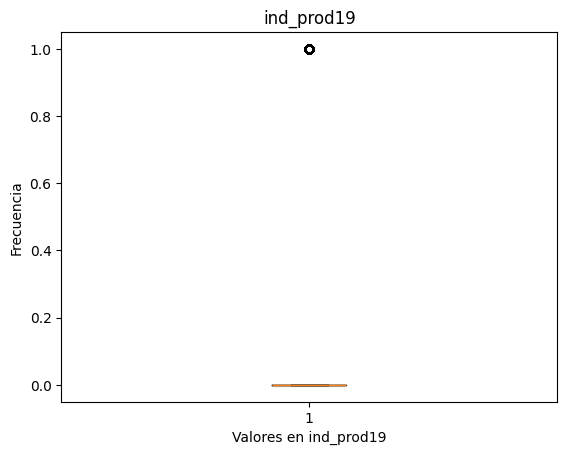

-------------------------- Análisis de la variable:  ind_prod20
Porcentaje de nulos;  0.0
Media de la variable:  0.026503036166143044
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


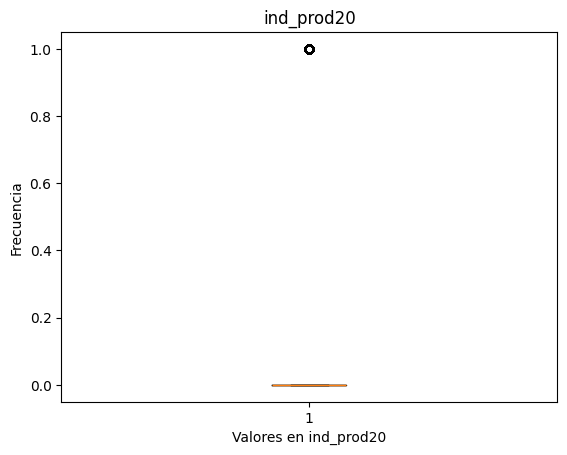

-------------------------- Análisis de la variable:  ind_prod21
Porcentaje de nulos;  0.0
Media de la variable:  0.0037562117721945793
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


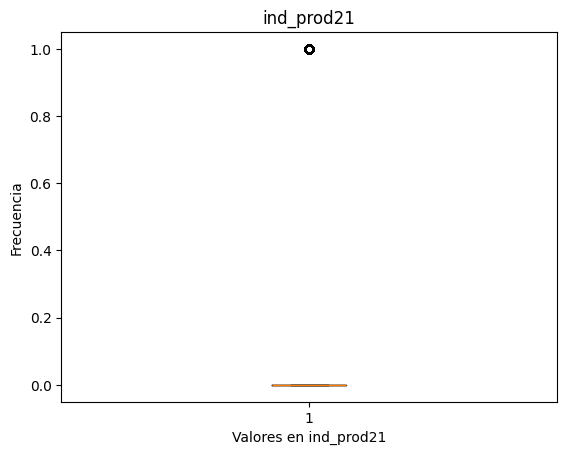

-------------------------- Análisis de la variable:  ind_prod22
Porcentaje de nulos;  0.004956272882792141
Media de la variable:  0.05556124547192079
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


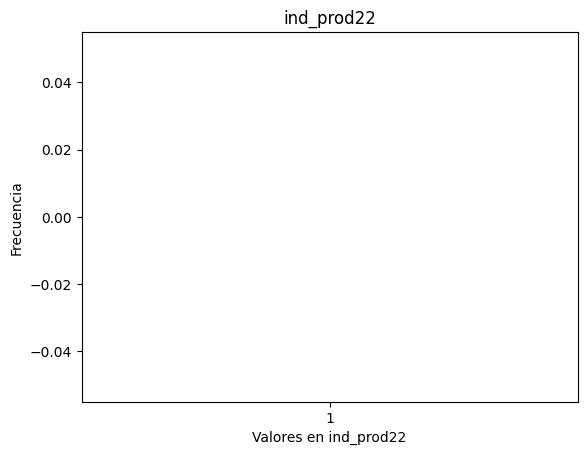

-------------------------- Análisis de la variable:  ind_prod23
Porcentaje de nulos;  0.004956272882792141
Media de la variable:  0.06029455559039535
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


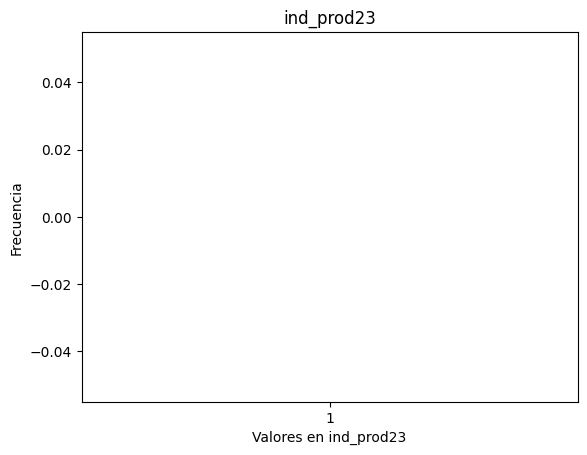

-------------------------- Análisis de la variable:  ind_prod24
Porcentaje de nulos;  0.0
Media de la variable:  0.12882671952253255
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


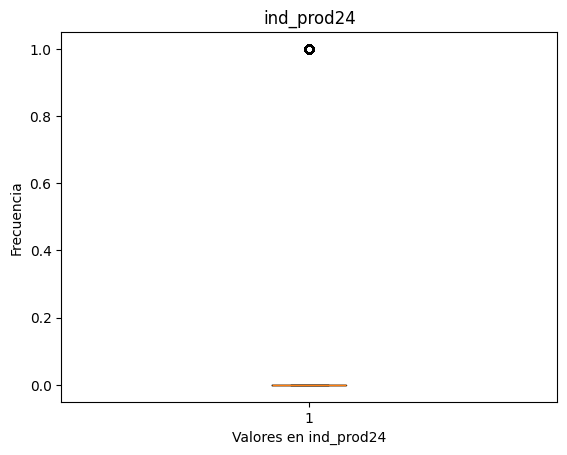

-------------------------- Análisis de la variable:  ind_prod25
Porcentaje de nulos;  0.0
Media de la variable:  0.06587550931017423
Mediana de la variable:  0.0
Percentil 25 de la variable:  0.0
Percentil 75 de la variable:  0.0


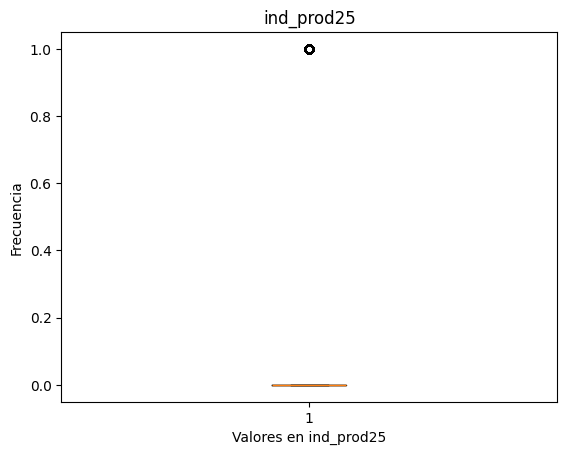

In [22]:
#Número de registros
n= 625470
for col in continuas:
  print("-------------------------- Análisis de la variable: ", col)
  # Cantidad de nulos
  cantidad_nulos = data_unida[col].isnull().sum()
  print("Porcentaje de nulos; ", cantidad_nulos / n * 100)
  # Medias/medianas percentil
  print("Media de la variable: ", data_unida[col].mean())
  print("Mediana de la variable: ", data_unida[col].median())
  print("Percentil 25 de la variable: ", data_unida[col].quantile(0.25))
  print("Percentil 75 de la variable: ", data_unida[col].quantile(0.75))
  plt.boxplot(data_unida[col])
  plt.xlabel('Valores en ' + col)
  plt.ylabel('Frecuencia')
  plt.title(col)
  plt.show()
  


Visualizacion de las distribuciones

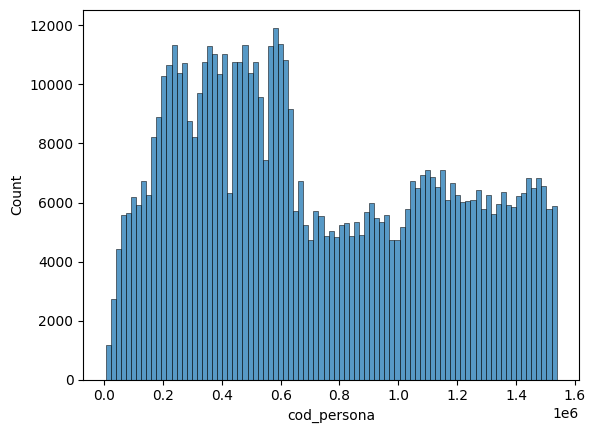

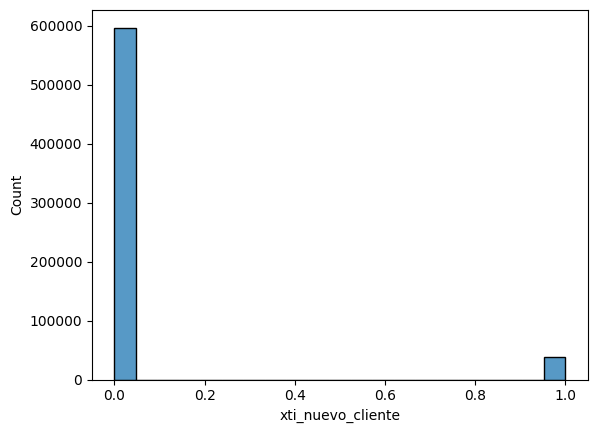

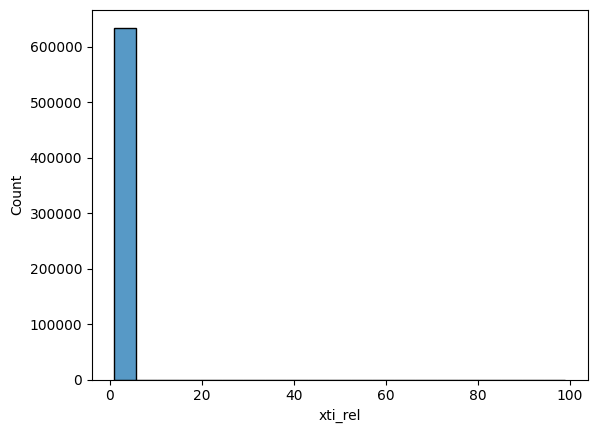

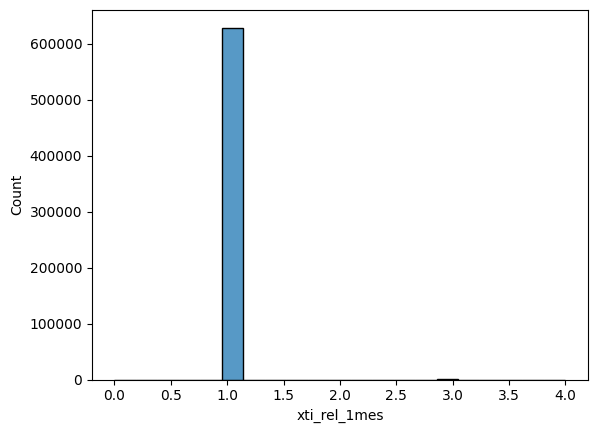

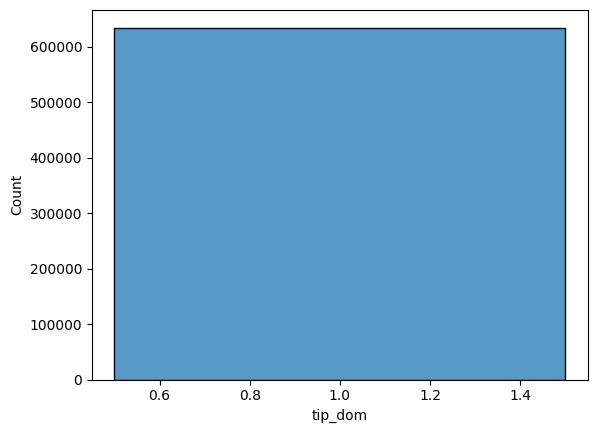

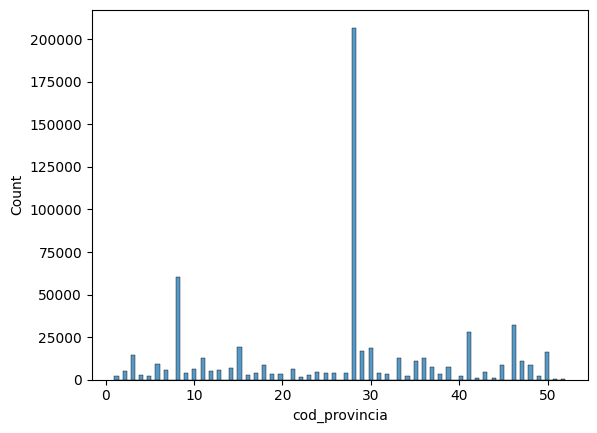

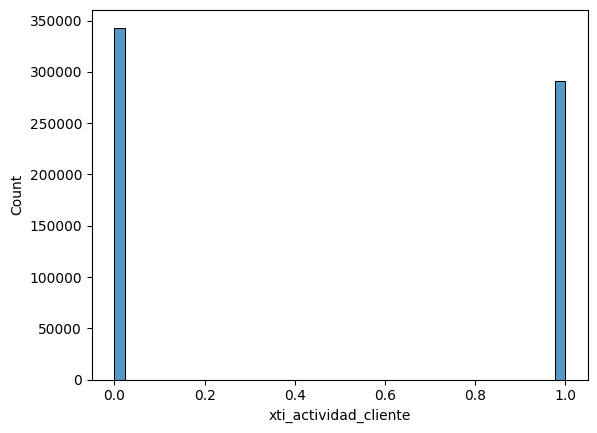

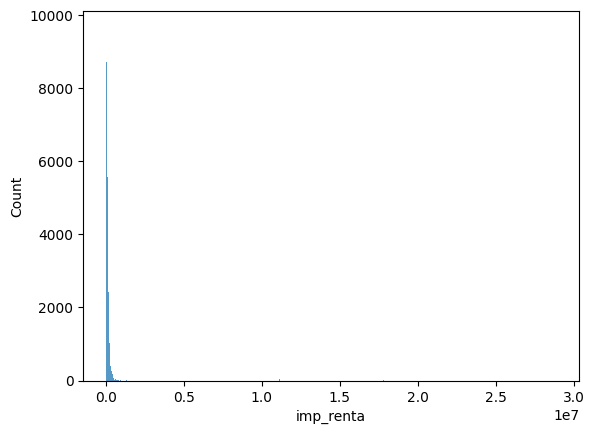

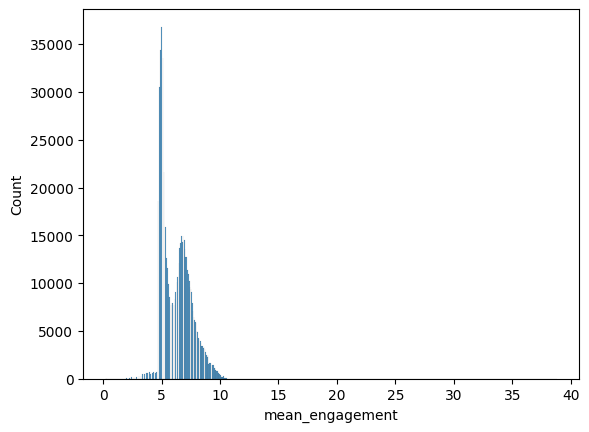

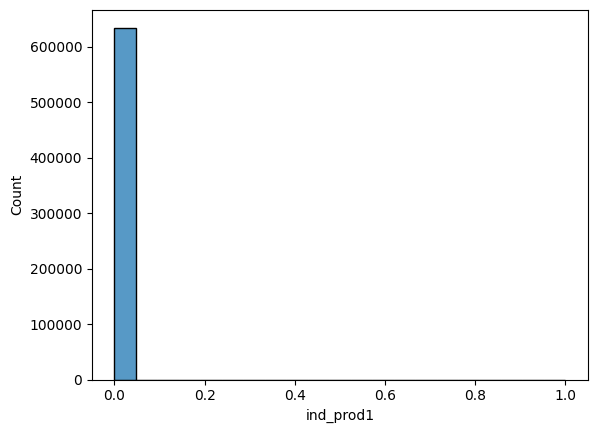

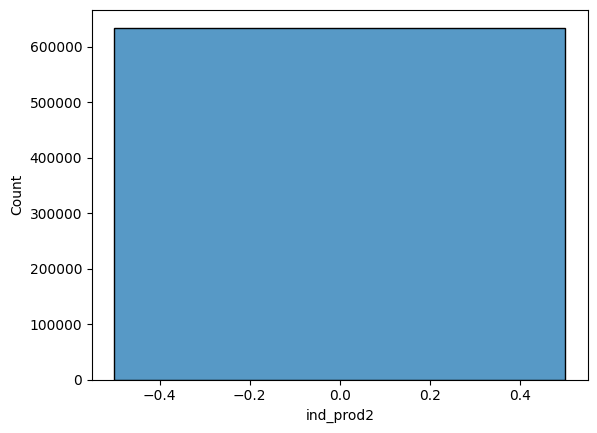

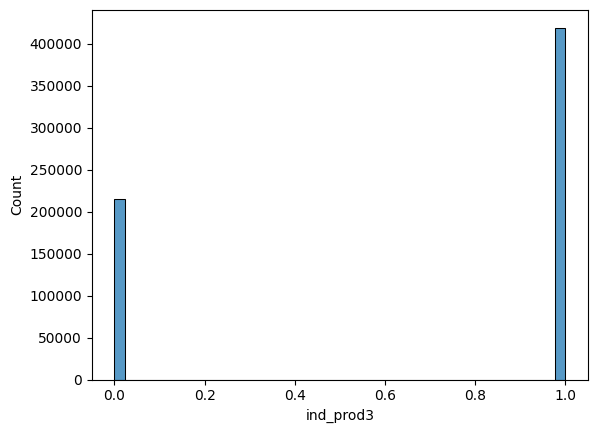

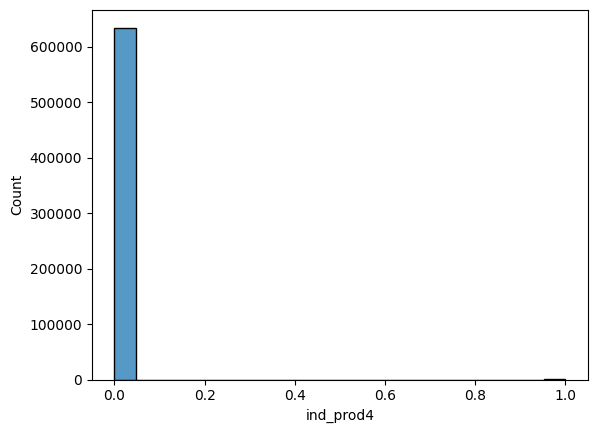

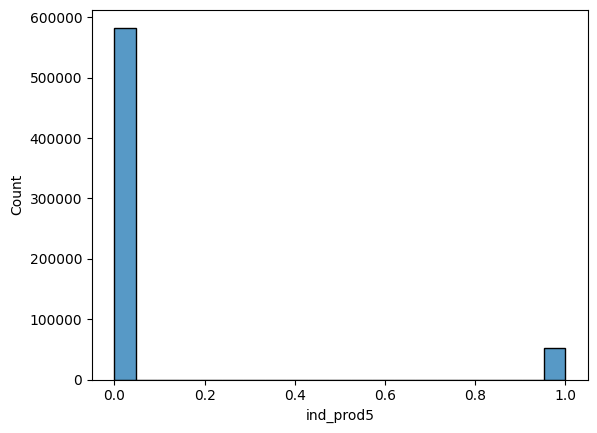

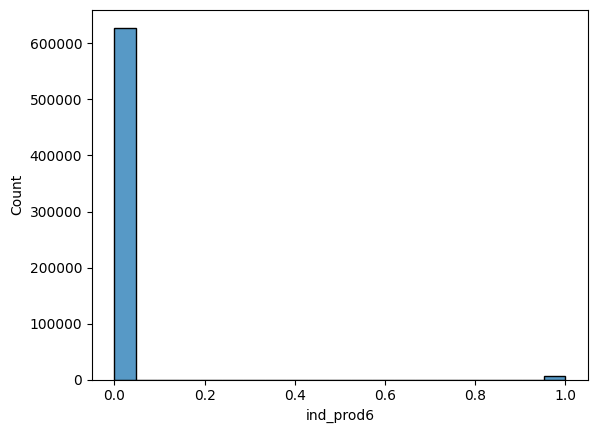

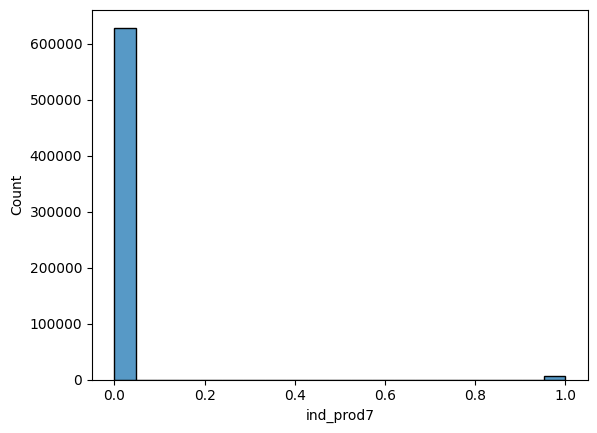

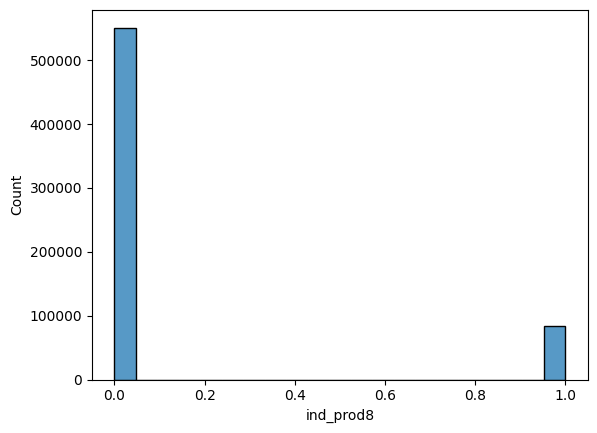

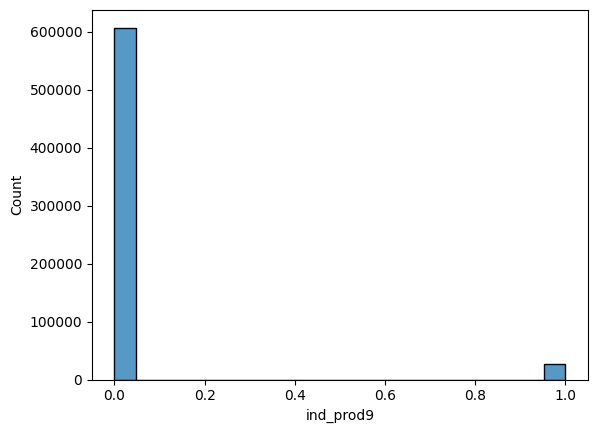

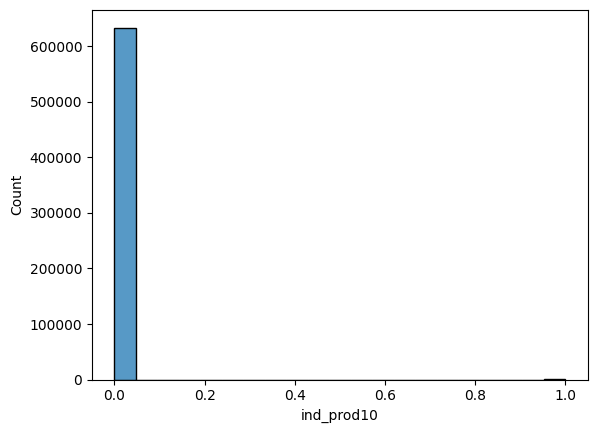

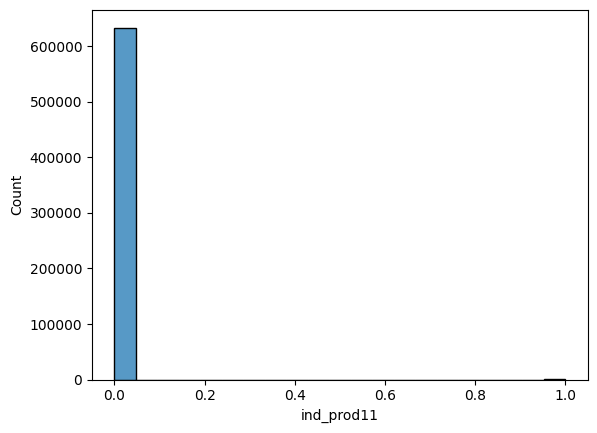

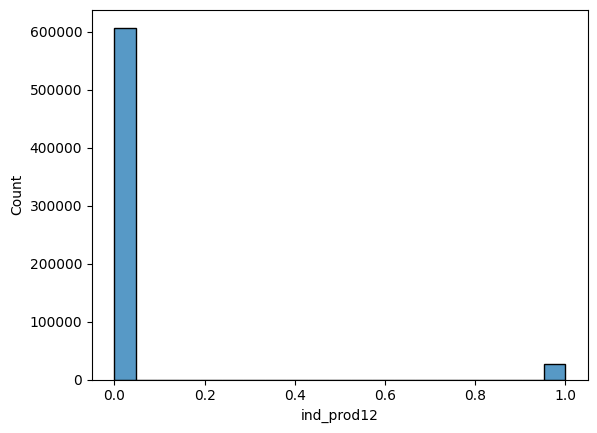

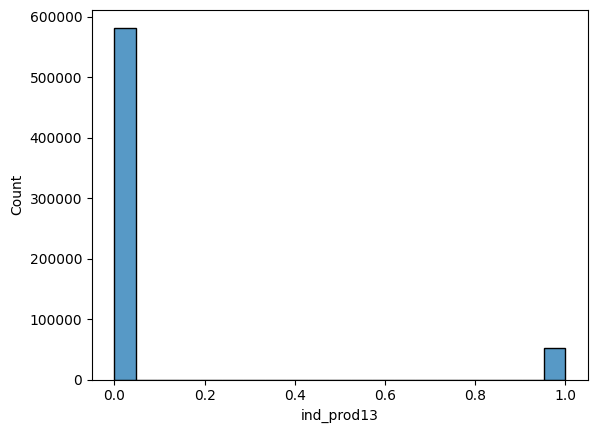

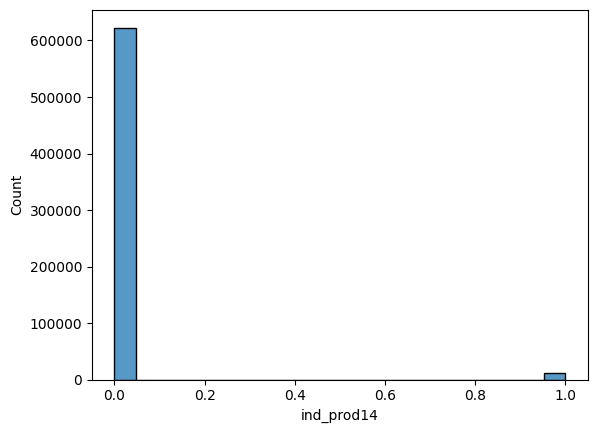

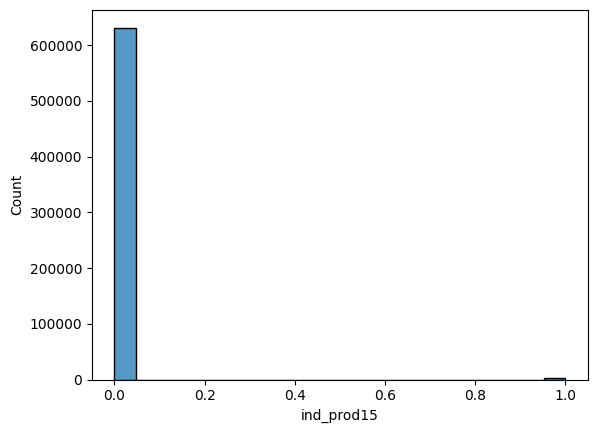

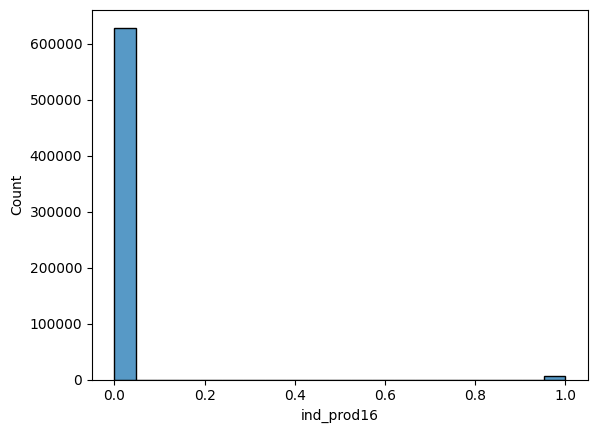

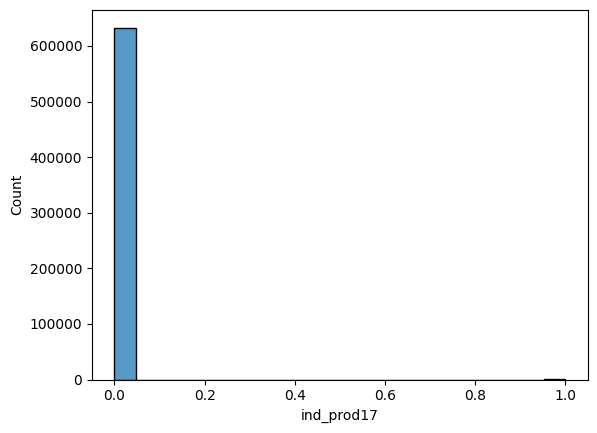

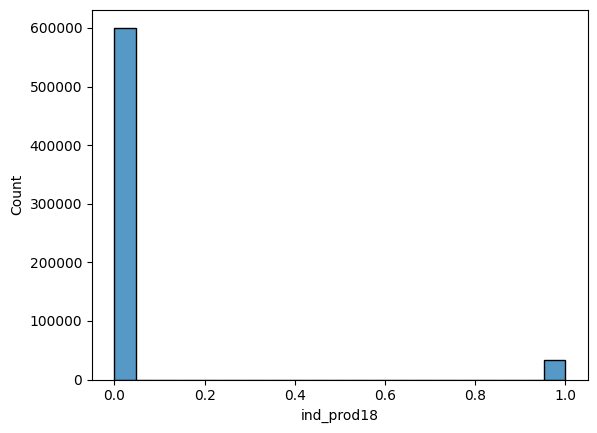

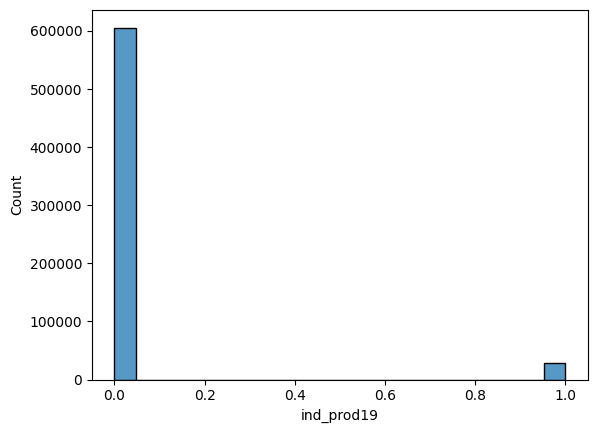

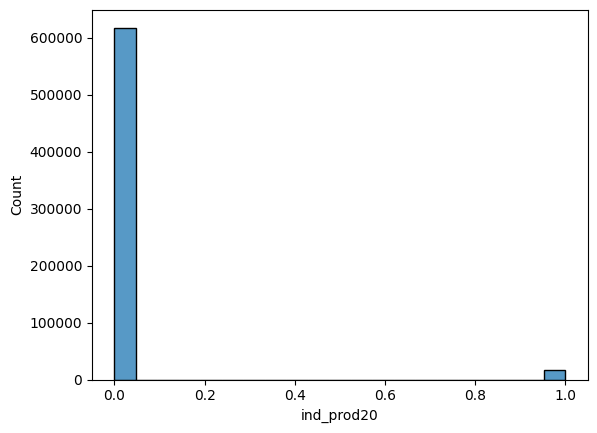

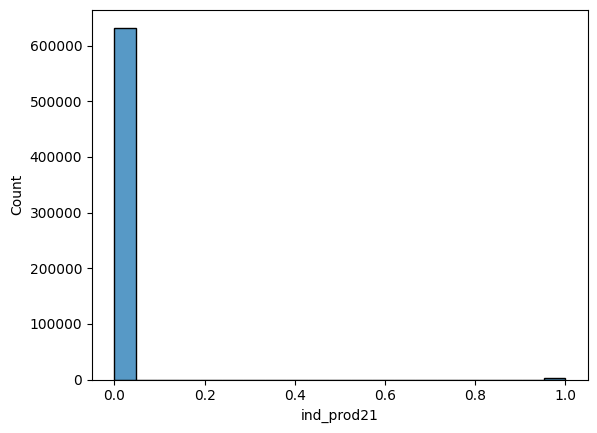

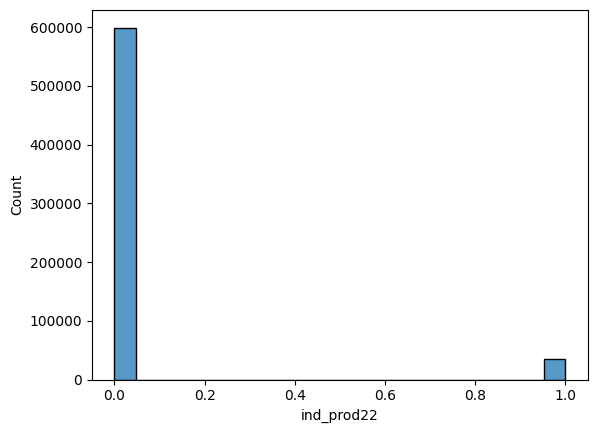

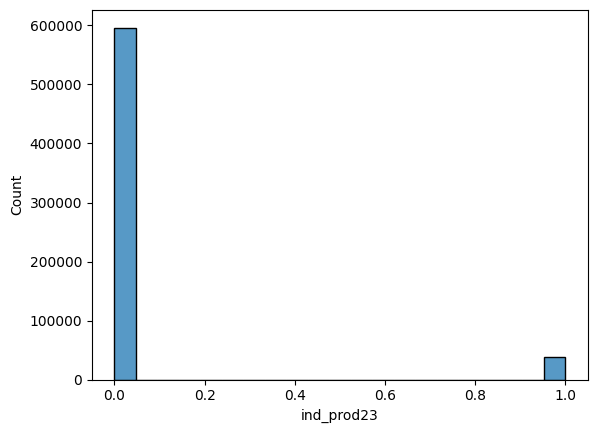

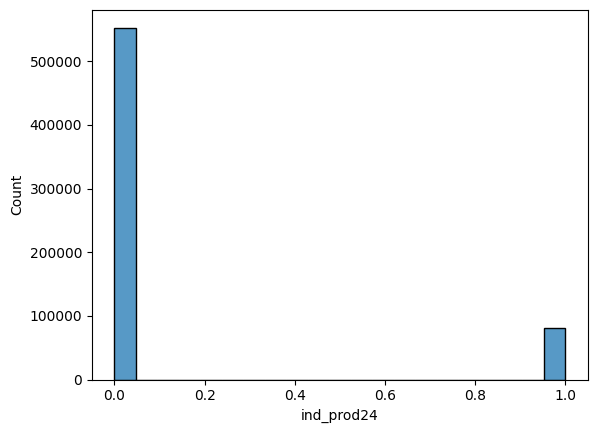

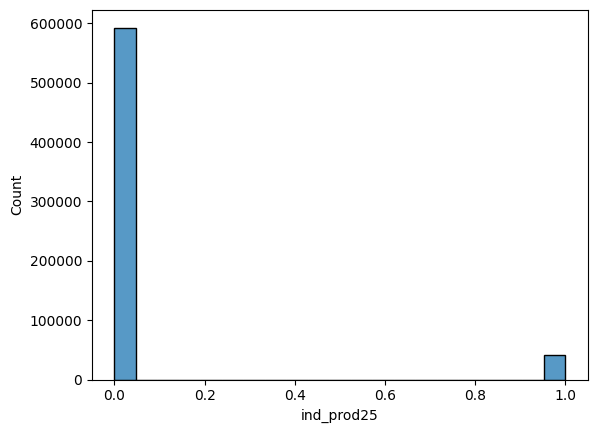

In [23]:
for col in continuas:
    sns.histplot(data_unida[col])
    plt.show()

Distribucion de la columna edad (Inicialmente con tipo de dato objeto)

<Axes: xlabel='edad', ylabel='Count'>

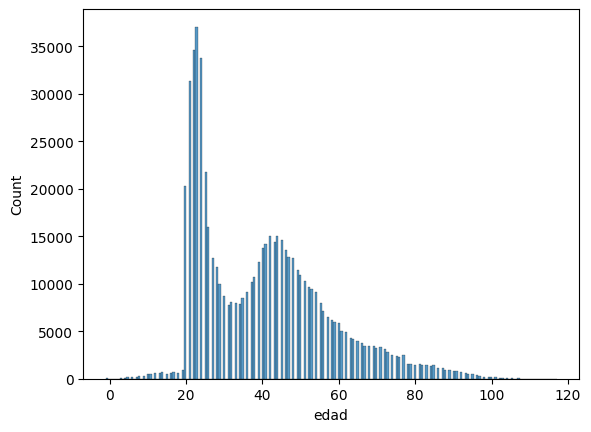

In [24]:
data_unida.replace(' NA', -1, inplace=True)
data_unida.replace('         NA', -1, inplace=True)
data_unida.fillna(-1, inplace=True)
sns.histplot(data_unida['edad'].astype(np.int32))

<Axes: ylabel='edad'>

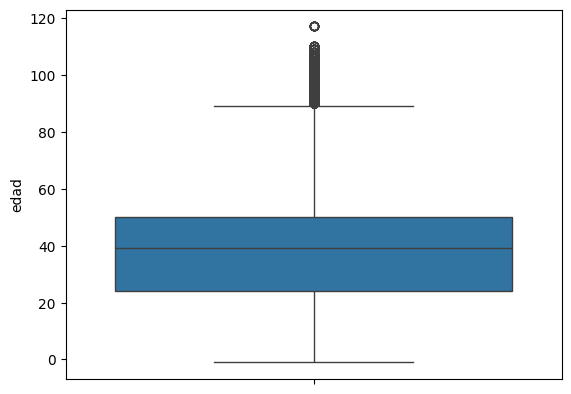

In [26]:
sns.boxplot(data_unida['edad'].astype(np.int32))

# **ANÁLISIS DESCRIPTIVO DE VARIABLES CATEGÓRICAS**
---

In [27]:
data_unida.describe(include=['object','category'])

mes    pais    sexo    edad      fecha1 xti_empleado  \
count       634682  634682  634682  634682      634682       634682   
unique          16      49       3     216        5797            5   
top     2016-04-28      ES       V      23  2014-10-03            N   
freq         46776  631736  346845   25095        2907       634158   

        num_antiguedad  fec_ult_cli_1t tip_rel_1mes indresi  indext des_canal  \
count           634682          634682       634682  634682  634682    634682   
unique             503              21            5       3       3       127   
top                 12              -1            I       S       N       KHE   
freq              6383          634646       340711  631736  604219    191157   

       xti_extra        id_segmento  
count     634682             634682  
unique         3                  4  
top            N  02 - PARTICULARES  
freq      633108             369955

## Variables categóricas

In [30]:
categoricas = []
for c in data_unida.columns:
    t = str(data_unida[c].dtype)
    if "object" in t or "category" in t:
        categoricas.append(c)
categoricas

['mes',
 'pais',
 'sexo',
 'edad',
 'fecha1',
 'xti_empleado',
 'num_antiguedad',
 'fec_ult_cli_1t',
 'tip_rel_1mes',
 'indresi',
 'indext',
 'des_canal',
 'xti_extra',
 'id_segmento']

Porcentaje de nulos;  0.0
Frecuencia de categorías:
mes
2016-04-28    46776
2016-03-28    46549
2016-02-28    46287
2016-01-28    45994
2015-12-28    45675
2015-11-28    45309
2015-10-28    44574
2015-09-28    43170
2015-08-28    42016
2015-07-28    41342
2015-06-28    31429
2015-05-28    31336
2015-04-28    31250
2015-03-28    31138
2015-02-28    30988
2015-01-28    30849
Name: count, dtype: int64


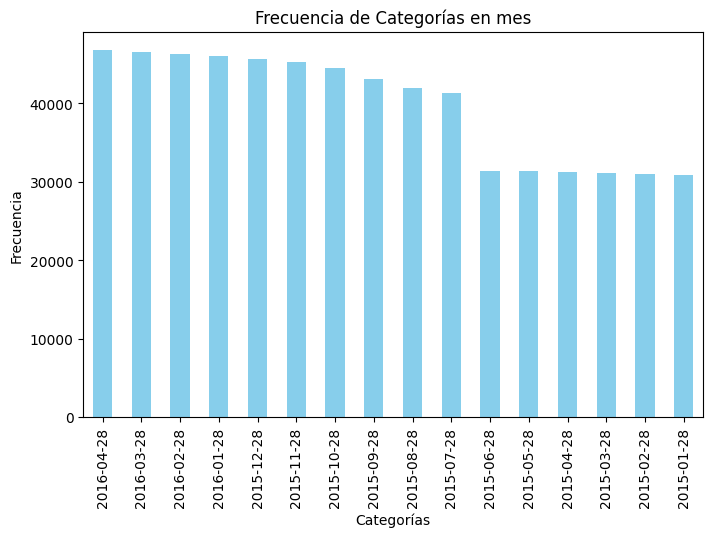

Porcentaje de nulos;  0.0
Frecuencia de categorías:
pais
ES    631736
DE       285
GB       244
FR       224
US       203
CH       192
CO       160
AR       144
IT       138
MX       122
RO       104
EC        90
VE        80
PY        74
CL        74
BE        64
-1        56
BR        52
AT        48
CA        48
FI        32
NL        32
PL        32
BG        32
CN        32
PE        32
BO        26
GN        16
NZ        16
SA        16
PK        16
GT        16
JP        16
IL        16
PR        16
GE        16
IN        16
AD        16
NG        16
UA        16
CU        16
PA        16
SV        16
PT        16
SE        16
AU        11
MD        10
RU        10
HU         7
Name: count, dtype: int64


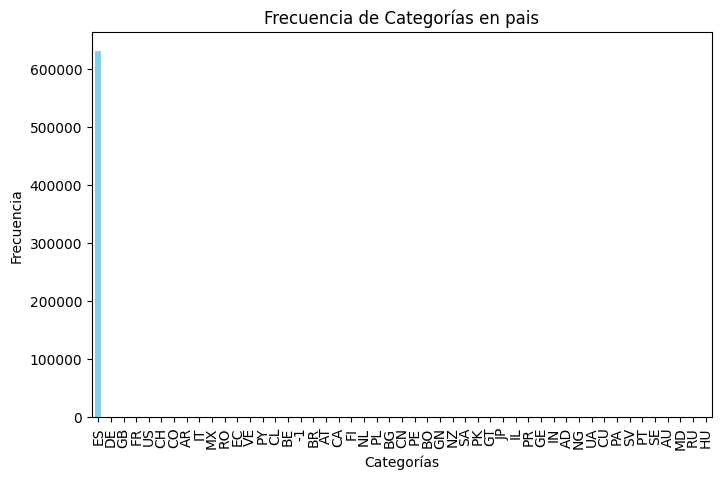

Porcentaje de nulos;  0.0
Frecuencia de categorías:
sexo
V     346845
H     287772
-1        65
Name: count, dtype: int64


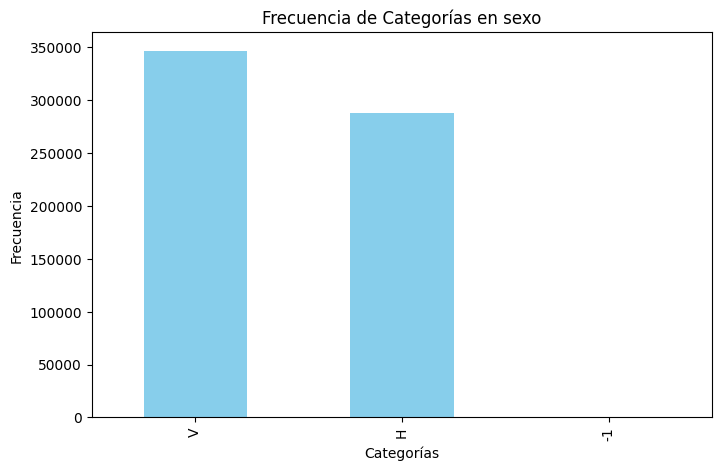

Porcentaje de nulos;  0.0
Frecuencia de categorías:
edad
23     25095
22     23936
24     23416
21     22674
20     17530
       ...  
2         10
109        8
108        8
105        6
103        5
Name: count, Length: 216, dtype: int64


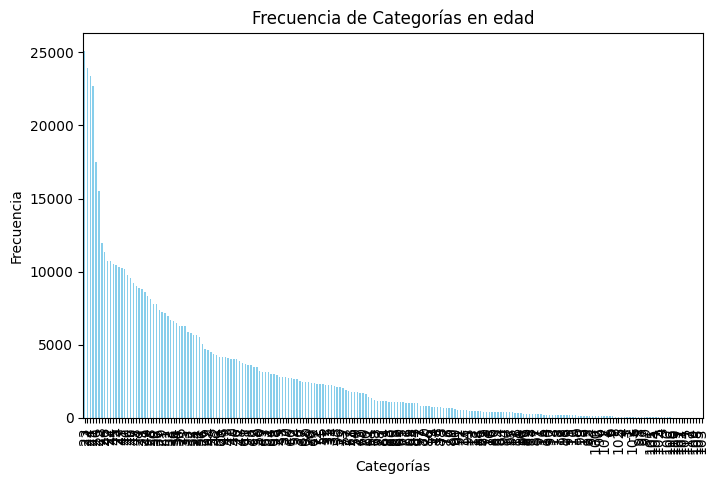

Porcentaje de nulos;  0.0
Frecuencia de categorías:
fecha1
2014-10-03    2907
2014-07-28    2516
2014-08-04    2385
2013-10-14    2046
2012-08-03    1443
              ... 
2016-03-19       2
2016-03-25       2
2016-04-09       1
2016-04-17       1
2016-04-16       1
Name: count, Length: 5797, dtype: int64


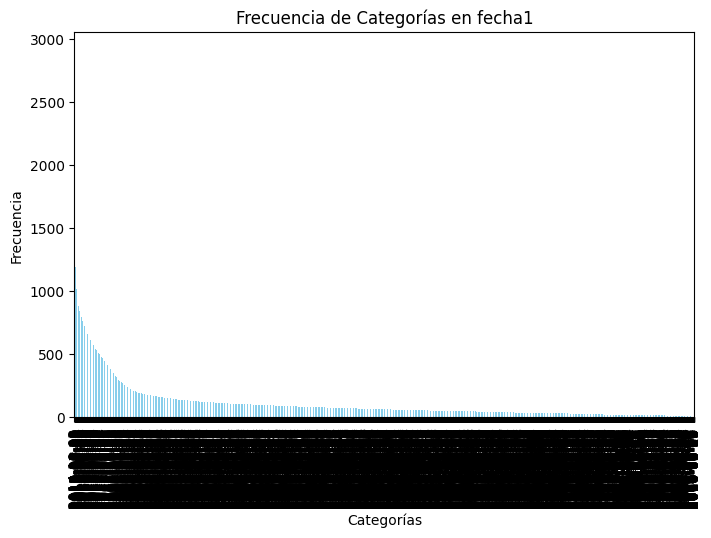

Porcentaje de nulos;  0.0
Frecuencia de categorías:
xti_empleado
N     634158
A        202
B        170
F         96
-1        56
Name: count, dtype: int64


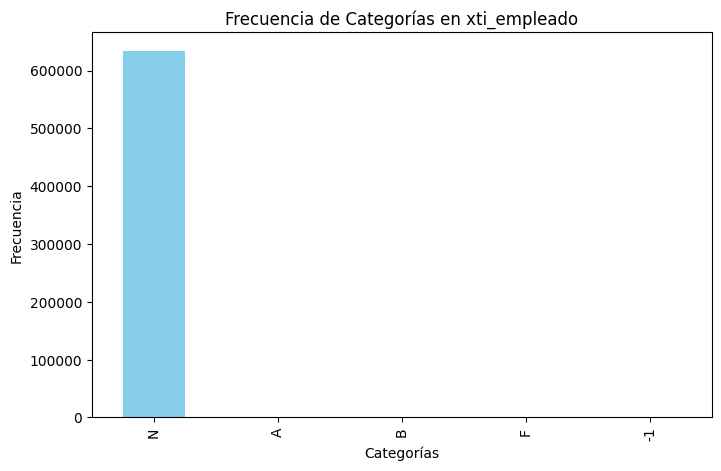

Porcentaje de nulos;  0.0
Frecuencia de categorías:
num_antiguedad
12         6383
1          6182
0          6028
3          5901
2          5868
           ... 
252          18
    244      12
253          11
254           9
255           3
Name: count, Length: 503, dtype: int64


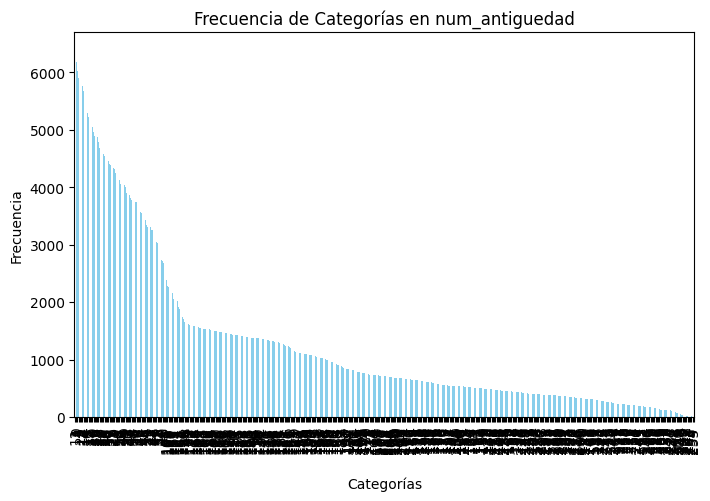

Porcentaje de nulos;  0.0
Frecuencia de categorías:
fec_ult_cli_1t
-1            634646
2015-07-30         7
2015-07-28         7
2015-12-24         3
2015-11-02         2
2015-10-02         2
2015-09-01         1
2015-09-24         1
2015-09-15         1
2015-10-07         1
2015-08-28         1
2015-10-01         1
2015-08-24         1
2015-11-24         1
2015-12-17         1
2015-08-06         1
2015-12-28         1
2016-01-12         1
2016-02-04         1
2016-02-16         1
2016-04-01         1
Name: count, dtype: int64


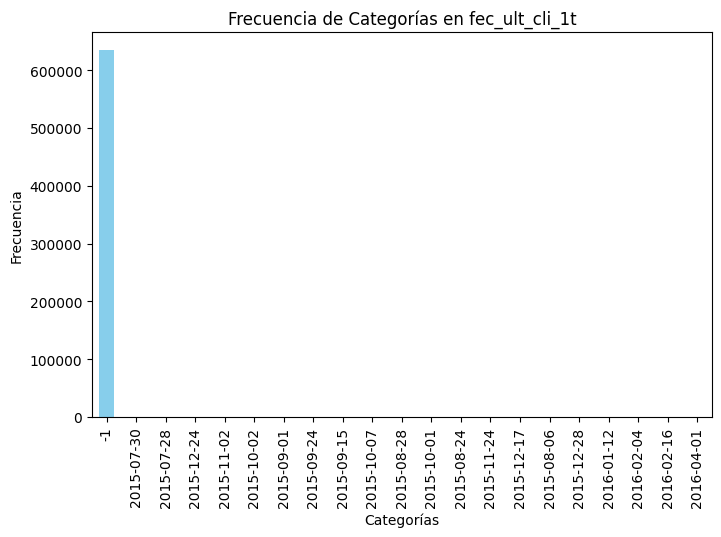

Porcentaje de nulos;  0.0
Frecuencia de categorías:
tip_rel_1mes
I     340711
A     288119
-1      5642
P        171
R         39
Name: count, dtype: int64


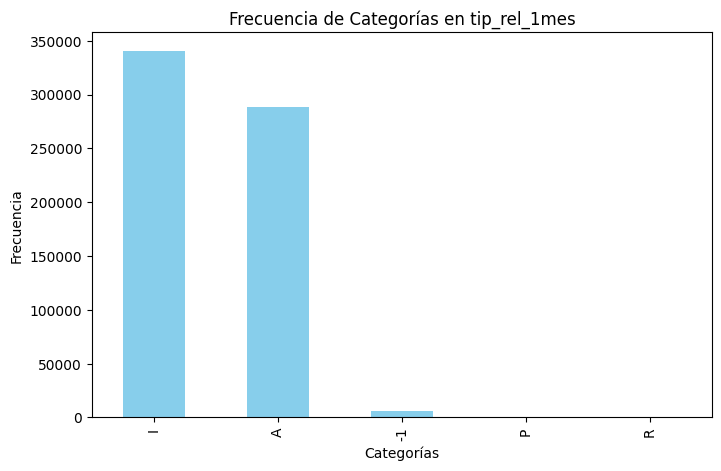

Porcentaje de nulos;  0.0
Frecuencia de categorías:
indresi
S     631736
N       2890
-1        56
Name: count, dtype: int64


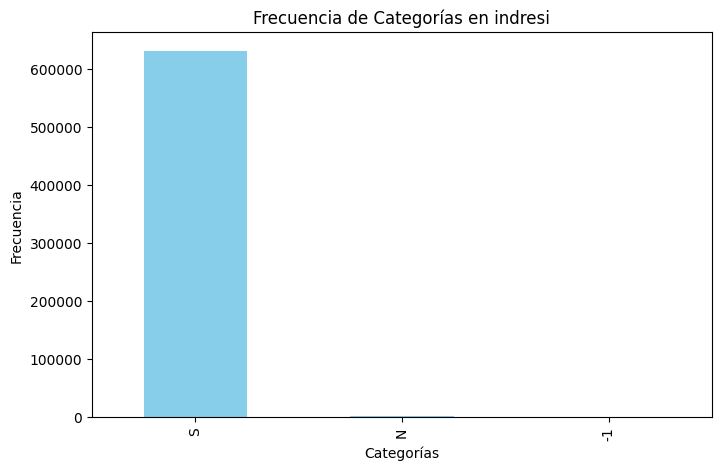

Porcentaje de nulos;  0.0
Frecuencia de categorías:
indext
N     604219
S      30407
-1        56
Name: count, dtype: int64


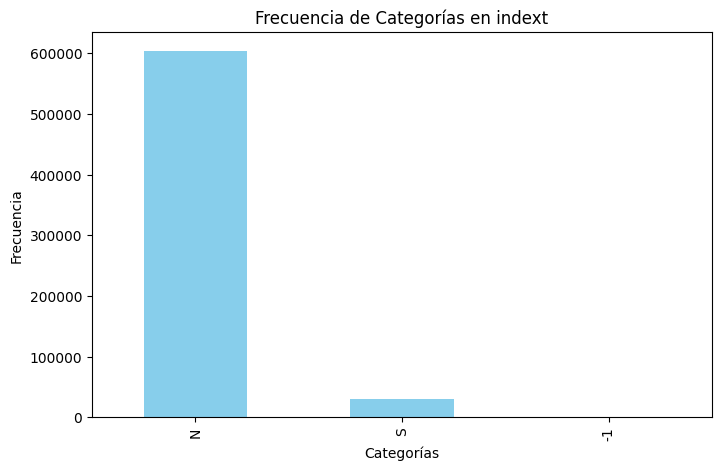

Porcentaje de nulos;  0.0
Frecuencia de categorías:
des_canal
KHE    191157
KAT    152054
KFC    146716
KHQ     25773
KFA     18941
        ...  
KCQ        10
KFM        10
KCP        10
KDV        10
K00        10
Name: count, Length: 127, dtype: int64


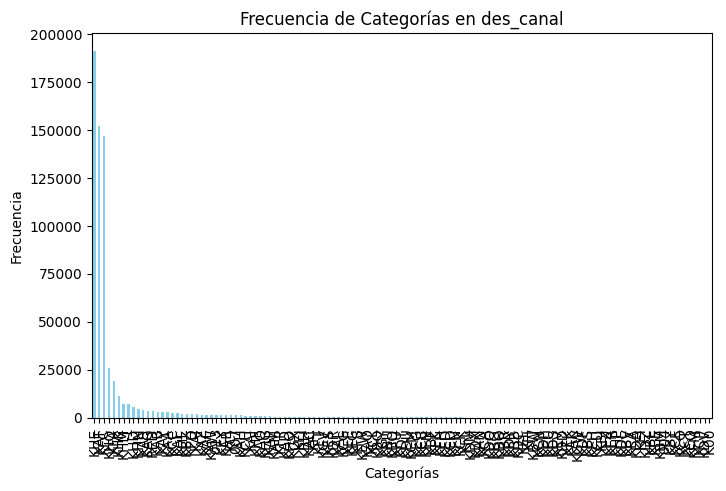

Porcentaje de nulos;  0.0
Frecuencia de categorías:
xti_extra
N     633108
S       1518
-1        56
Name: count, dtype: int64


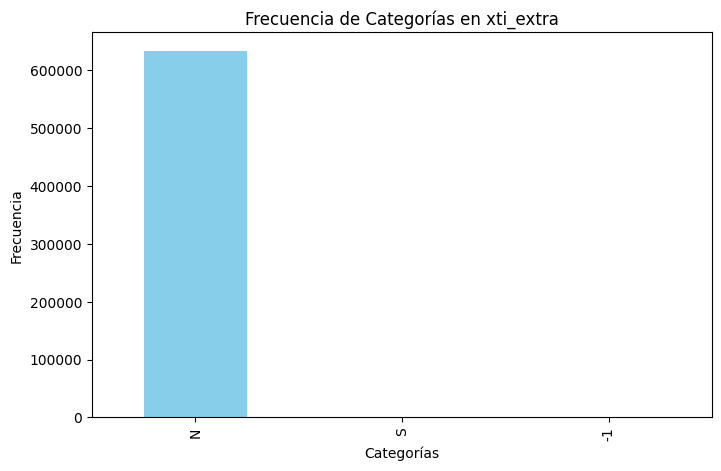

Porcentaje de nulos;  0.0
Frecuencia de categorías:
id_segmento
02 - PARTICULARES     369955
03 - UNIVERSITARIO    230740
01 - TOP               26584
-1                      7403
Name: count, dtype: int64


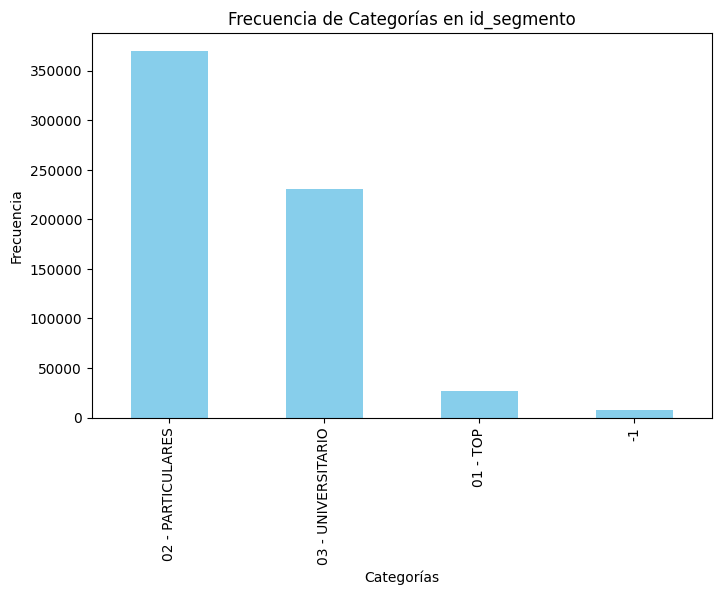

In [31]:
#Número de registros
n= 625470
for col in categoricas:
  # Cantidad de nulos
  cantidad_nulos = data_unida[col].isnull().sum()
  print("Porcentaje de nulos; ", cantidad_nulos / n * 100)
  # 1. Exploración de Frecuencias
  frecuencia_categoria = data_unida[col].value_counts()
  print("Frecuencia de categorías:")
  print(frecuencia_categoria)

  # Gráfico de barras para visualizar las frecuencias
  plt.figure(figsize=(8, 5))
  frecuencia_categoria.plot(kind='bar', color='skyblue')
  plt.title(f'Frecuencia de Categorías en {col}')
  plt.xlabel('Categorías')
  plt.ylabel('Frecuencia')
  plt.show()

 

## Análisis de productos por id_segmento y edad

In [32]:
data= data_unida.copy()

In [33]:
inds=[f'ind_prod{i}' for i in range(1,26)]
data.groupby(by=['id_segmento'])[inds].sum()

ind_prod1  ind_prod2  ind_prod3  ind_prod4  ind_prod5  \
id_segmento                                                                 
-1                          0          0       3647          0         30   
01 - TOP                    0          0      16264         97       8400   
02 - PARTICULARES          64          0     206682        201      35719   
03 - UNIVERSITARIO          0          0     192897         16       7730   

                    ind_prod6  ind_prod7  ind_prod8  ind_prod9  ind_prod10  \
id_segmento                                                                  
-1                         29         96          5          0          38   
01 - TOP                    0        890       7240       4036         395   
02 - PARTICULARES        6313       4880      75007      23000         820   
03 - UNIVERSITARIO          0        370       1468        575          39   

                    ...  ind_prod16  ind_prod17  ind_prod18  ind_prod19  \
id_segmento         ...                                                   
-1                  ...           1           0          14           2   
01 - TOP            ...        1766          48        5454        5503   
02 - PARTICULARES   ...        4028        1658       26557       21923   
03 - UNIVERSITARIO  ...          84          19        1979        1453   

                    ind_prod20  ind_prod21  ind_prod22  ind_prod23  \
id_segmento                                                          
-1                           0           0        -6.0        -6.0   
01 - TOP                  5588         334      6077.0      6925.0   
02 - PARTICULARES        10761        2050     24328.0     26366.0   
03 - UNIVERSITARIO         472           0      4832.0      4950.0   

                    ind_prod24  ind_prod25  
id_segmento                                 
-1                          34           2  
01 - TOP                 10407        9207  
02 - PARTICULARES        59836       30810  
03 - UNIVERSITARIO       11487        1791  

[4 rows x 25 columns]

In [34]:
for seg in data['id_segmento'].unique():
    print('\n Productos comprados por agupacion id-segmento: ',seg)
    data_red=data[data['id_segmento']==seg]
    print(data_red[inds].sum())


 Productos comprados por agupacion id-segmento:  02 - PARTICULARES
ind_prod1         64.0
ind_prod2          0.0
ind_prod3     206682.0
ind_prod4        201.0
ind_prod5      35719.0
ind_prod6       6313.0
ind_prod7       4880.0
ind_prod8      75007.0
ind_prod9      23000.0
ind_prod10       820.0
ind_prod11       788.0
ind_prod12     13504.0
ind_prod13     36413.0
ind_prod14      6454.0
ind_prod15      2755.0
ind_prod16      4028.0
ind_prod17      1658.0
ind_prod18     26557.0
ind_prod19     21923.0
ind_prod20     10761.0
ind_prod21      2050.0
ind_prod22     24328.0
ind_prod23     26366.0
ind_prod24     59836.0
ind_prod25     30810.0
dtype: float64

 Productos comprados por agupacion id-segmento:  03 - UNIVERSITARIO
ind_prod1          0.0
ind_prod2          0.0
ind_prod3     192897.0
ind_prod4         16.0
ind_prod5       7730.0
ind_prod6          0.0
ind_prod7        370.0
ind_prod8       1468.0
ind_prod9        575.0
ind_prod10        39.0
ind_prod11         6.0
ind_prod12       570

In [35]:
for seg in data['edad'].unique():
    print('\n Productos comprados por agupacion id-segmento: ',seg)
    data_red=data[data['edad']==seg]
    print(data_red[inds].sum())


 Productos comprados por agupacion id-segmento:   35
ind_prod1        0.0
ind_prod2        0.0
ind_prod3     1615.0
ind_prod4        0.0
ind_prod5      354.0
ind_prod6        0.0
ind_prod7       64.0
ind_prod8      173.0
ind_prod9      114.0
ind_prod10      12.0
ind_prod11      12.0
ind_prod12      73.0
ind_prod13     424.0
ind_prod14      29.0
ind_prod15       0.0
ind_prod16       0.0
ind_prod17      33.0
ind_prod18     176.0
ind_prod19     157.0
ind_prod20      58.0
ind_prod21      23.0
ind_prod22     246.0
ind_prod23     246.0
ind_prod24     563.0
ind_prod25     204.0
dtype: float64

 Productos comprados por agupacion id-segmento:   27
ind_prod1        0.0
ind_prod2        0.0
ind_prod3     3649.0
ind_prod4        0.0
ind_prod5      174.0
ind_prod6        0.0
ind_prod7       12.0
ind_prod8       31.0
ind_prod9       41.0
ind_prod10       0.0
ind_prod11       0.0
ind_prod12      20.0
ind_prod13      50.0
ind_prod14      11.0
ind_prod15       0.0
ind_prod16       0.0
ind_prod17      

In [36]:
data.replace(' NA', -1, inplace=True)
data.replace('         NA', -1, inplace=True)
data.fillna(-1, inplace=True)

<Axes: xlabel='edad', ylabel='Count'>

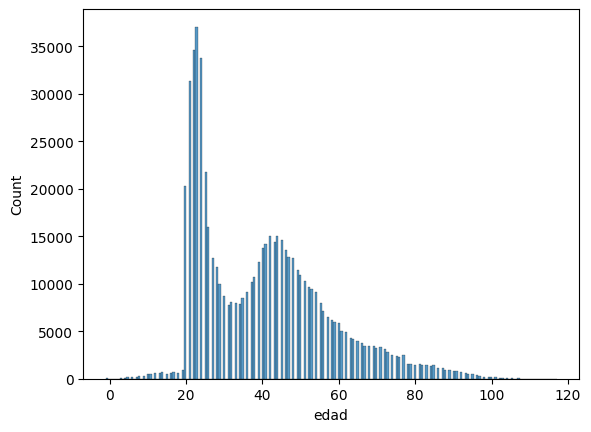

In [37]:
data.replace(' NA', -1, inplace=True)
data.replace('         NA', -1, inplace=True)
data.fillna(-1, inplace=True)
sns.histplot(data['edad'].astype(np.int32))

In [38]:
data['edad_dividida'] = pd.cut(data['edad'].astype(np.int32), bins=[-np.inf, -1, 18, 26, np.inf], labels=['Menor', 'Adolescente', 'Universitario', 'Adulto'])

In [39]:
for seg in data['edad_dividida'].unique():
    print('\n Productos comprados por agupacion edad: ',seg)
    data_red=data[data['edad_dividida']==seg]
    print(data_red[inds].sum())


 Productos comprados por agupacion edad:  Adulto
ind_prod1         64.0
ind_prod2          0.0
ind_prod3     258563.0
ind_prod4        314.0
ind_prod5      48353.0
ind_prod6          0.0
ind_prod7       5938.0
ind_prod8      82674.0
ind_prod9      27464.0
ind_prod10      1259.0
ind_prod11      1205.0
ind_prod12     27295.0
ind_prod13     50476.0
ind_prod14     11761.0
ind_prod15      3348.0
ind_prod16      5879.0
ind_prod17      1712.0
ind_prod18     33576.0
ind_prod19     28636.0
ind_prod20     16730.0
ind_prod21      2384.0
ind_prod22     33521.0
ind_prod23     36393.0
ind_prod24     76219.0
ind_prod25     41476.0
dtype: float64

 Productos comprados por agupacion edad:  Universitario
ind_prod1          0.0
ind_prod2          0.0
ind_prod3     160911.0
ind_prod4          0.0
ind_prod5       3526.0
ind_prod6        434.0
ind_prod7        296.0
ind_prod8       1046.0
ind_prod9        147.0
ind_prod10        27.0
ind_prod11         0.0
ind_prod12       262.0
ind_prod13      2287.0
ind_

In [40]:
for seg in data['edad_dividida'].unique():
    print('\n Productos comprados por agupacion edad: ',seg)
    data_red=data[data['edad_dividida']==seg]
    print(data_red[inds].sum())


 Productos comprados por agupacion edad:  Adulto
ind_prod1         64.0
ind_prod2          0.0
ind_prod3     258563.0
ind_prod4        314.0
ind_prod5      48353.0
ind_prod6          0.0
ind_prod7       5938.0
ind_prod8      82674.0
ind_prod9      27464.0
ind_prod10      1259.0
ind_prod11      1205.0
ind_prod12     27295.0
ind_prod13     50476.0
ind_prod14     11761.0
ind_prod15      3348.0
ind_prod16      5879.0
ind_prod17      1712.0
ind_prod18     33576.0
ind_prod19     28636.0
ind_prod20     16730.0
ind_prod21      2384.0
ind_prod22     33521.0
ind_prod23     36393.0
ind_prod24     76219.0
ind_prod25     41476.0
dtype: float64

 Productos comprados por agupacion edad:  Universitario
ind_prod1          0.0
ind_prod2          0.0
ind_prod3     160911.0
ind_prod4          0.0
ind_prod5       3526.0
ind_prod6        434.0
ind_prod7        296.0
ind_prod8       1046.0
ind_prod9        147.0
ind_prod10        27.0
ind_prod11         0.0
ind_prod12       262.0
ind_prod13      2287.0
ind_

In [41]:
for seg in data['id_segmento'].unique():
    for ed in data['edad_dividida'].unique():
        print('\n Productos comprados por agupacion edad y segmento: ',ed,seg)
        data_red=data[(data['edad_dividida']==ed) & (data['id_segmento']==seg)]
        print(data_red[inds].sum())


 Productos comprados por agupacion edad y segmento:  Adulto 02 - PARTICULARES
ind_prod1         64.0
ind_prod2          0.0
ind_prod3     202868.0
ind_prod4        201.0
ind_prod5      35102.0
ind_prod6          0.0
ind_prod7       4779.0
ind_prod8      74451.0
ind_prod9      22924.0
ind_prod10       813.0
ind_prod11       788.0
ind_prod12     13391.0
ind_prod13     35377.0
ind_prod14      6438.0
ind_prod15      2755.0
ind_prod16      4028.0
ind_prod17      1652.0
ind_prod18     26413.0
ind_prod19     21833.0
ind_prod20     10735.0
ind_prod21      2050.0
ind_prod22     23990.0
ind_prod23     25996.0
ind_prod24     59094.0
ind_prod25     30694.0
dtype: float64

 Productos comprados por agupacion edad y segmento:  Universitario 02 - PARTICULARES
ind_prod1        0.0
ind_prod2        0.0
ind_prod3     3814.0
ind_prod4        0.0
ind_prod5      617.0
ind_prod6      432.0
ind_prod7      101.0
ind_prod8      556.0
ind_prod9       76.0
ind_prod10       7.0
ind_prod11       0.0
ind_prod12    

# **Pruebas de limpieza de datos**
---

In [54]:
data2=pd.read_csv('dataset_para_modelar.csv')
data2=data2.iloc[:,1:]
data2.shape
data2=data2.sort_values(by=['cod_persona','mes']).reset_index()
data2.drop('index',axis=1,inplace=True)

In [55]:
data2.isna().sum() #/ len(data_unida)

cod_persona                   0
mes                           0
pais                         56
sexo                         65
edad                          0
fecha1                       56
xti_empleado                 56
xti_nuevo_cliente            56
num_antiguedad                0
xti_rel                      56
fec_ult_cli_1t           634646
xti_rel_1mes               5642
tip_rel_1mes               5642
indresi                      56
indext                       56
des_canal                  7178
xti_extra                    56
tip_dom                      56
cod_provincia              2946
xti_actividad_cliente        56
imp_renta                124164
id_segmento                7403
mean_engagement            5642
ind_prod1                     0
ind_prod2                     0
ind_prod3                     0
ind_prod4                     0
ind_prod5                     0
ind_prod6                     0
ind_prod7                     0
ind_prod8                     0
ind_prod

In [56]:
#Eliminacion de la columna fec_ult_cli_1t porque solo tiene 40 no nulos.
data2.drop('fec_ult_cli_1t',axis=1,inplace=True)

In [57]:
data2[data2['pais'].isna()]['cod_persona'].unique()

array([ 170635,  183684,  205901,  210920,  216184,  256163,  289373,
        300713,  372326,  421992,  532938,  672042,  931306, 1012056,
       1097377, 1185286, 1390588, 1500541], dtype=int64)

In [58]:
data2.isna().sum()

cod_persona                   0
mes                           0
pais                         56
sexo                         65
edad                          0
fecha1                       56
xti_empleado                 56
xti_nuevo_cliente            56
num_antiguedad                0
xti_rel                      56
xti_rel_1mes               5642
tip_rel_1mes               5642
indresi                      56
indext                       56
des_canal                  7178
xti_extra                    56
tip_dom                      56
cod_provincia              2946
xti_actividad_cliente        56
imp_renta                124164
id_segmento                7403
mean_engagement            5642
ind_prod1                     0
ind_prod2                     0
ind_prod3                     0
ind_prod4                     0
ind_prod5                     0
ind_prod6                     0
ind_prod7                     0
ind_prod8                     0
ind_prod9                     0
ind_prod

In [59]:
data2

cod_persona         mes pais sexo edad      fecha1 xti_empleado  \
0              5514  2016-04-28   ES    H   44  2016-04-29            N   
1              5541  2016-04-28   ES    H   60  2016-04-29            N   
2              5631  2016-04-28   ES    V   53  2016-04-28            N   
3              5656  2016-04-28   ES    H   47  2016-04-28            N   
4              5738  2016-04-28   ES    V   48  2016-04-28            N   
...             ...         ...  ...  ...  ...         ...          ...   
634677      1537800  2015-12-28   ES    V   56  1995-01-16            F   
634678      1537800  2016-01-28   ES    V   56  1995-01-16            F   
634679      1537800  2016-02-28   ES    V   56  1995-01-16            F   
634680      1537800  2016-03-28   ES    V   56  1995-01-16            F   
634681      1537800  2016-04-28   ES    V   56  1995-01-16            F   

        xti_nuevo_cliente num_antiguedad  xti_rel  ...  ind_prod16 ind_prod17  \
0                     1.0              0      1.0  ...           0          0   
1                     1.0              0      1.0  ...           0          0   
2                     1.0              0      1.0  ...           0          0   
3                     1.0              0      1.0  ...           0          0   
4                     1.0              0      1.0  ...           0          0   
...                   ...            ...      ...  ...         ...        ...   
634677                0.0            250      1.0  ...           0          0   
634678                0.0            251      1.0  ...           0          0   
634679                0.0            252      1.0  ...           0          0   
634680                0.0            253      1.0  ...           0          0   
634681                0.0            254      1.0  ...           0          0   

       ind_prod18 ind_prod19 ind_prod20 ind_prod21  ind_prod22  ind_prod23  \
0               0          0          0          0         0.0         0.0   
1               0          0          0          0         0.0         0.0   
2               0          0          0          0         0.0         0.0   
3               0          0          0          0         0.0         0.0   
4               0          0          0          0         0.0         0.0   
...           ...        ...        ...        ...         ...         ...   
634677          0          1          1          0         0.0         0.0   
634678          0          1          1          0         0.0         0.0   
634679          0          0          1          0         0.0         0.0   
634680          0          1          1          0         0.0         0.0   
634681          0          0          1          0         0.0         0.0   

        ind_prod24  ind_prod25  
0                0           0  
1                0           0  
2                0           0  
3                0           0  
4                0           0  
...            ...         ...  
634677           0           1  
634678           0           1  
634679           0           1  
634680           0           1  
634681           0           1  

[634682 rows x 47 columns]

In [61]:
#Esp en paises nulos
moda_pais = data2['pais'].mode()[0]
data2['pais'].fillna(moda_pais, inplace=True)

In [63]:
#Codigo de provincia
paises = list(data2['pais'].unique())
if 'ES' in paises:
    paises.remove('ES')
map_paises = {valor: 100 + i for i, valor in enumerate(paises)}
data2['cod_provincia'] = data2.apply(lambda x: map_paises.get(x.pais, x.cod_provincia) if x.pais != 'ES' else x.cod_provincia, axis=1)
prov_imputer = SimpleImputer(strategy='most_frequent')
data2['cod_provincia'] = prov_imputer.fit_transform(data2[['cod_provincia']])

In [64]:
#Imputamos el sexo con la moda
moda_sexo = data2['sexo'].mode()[0]
data2['sexo'].fillna(moda_sexo, inplace=True)

In [66]:
data2.isna().sum()

cod_persona                   0
mes                           0
pais                          0
sexo                          0
edad                          0
fecha1                       56
xti_empleado                 56
xti_nuevo_cliente            56
num_antiguedad                0
xti_rel                      56
xti_rel_1mes               5642
tip_rel_1mes               5642
indresi                      56
indext                       56
des_canal                  7178
xti_extra                    56
tip_dom                      56
cod_provincia                 0
xti_actividad_cliente        56
imp_renta                124164
id_segmento                7403
mean_engagement            5642
ind_prod1                     0
ind_prod2                     0
ind_prod3                     0
ind_prod4                     0
ind_prod5                     0
ind_prod6                     0
ind_prod7                     0
ind_prod8                     0
ind_prod9                     0
ind_prod

In [67]:
#Lista negra de usuarios sin informacion
lista_negra=list(data2[data2['fecha1'].isna()]['cod_persona'].unique())
data2[data2['fecha1'].isna()]

cod_persona         mes pais sexo edad fecha1 xti_empleado  \
49307        170635  2015-02-28   ES    V   NA    NaN          NaN   
49308        170635  2015-03-28   ES    V   NA    NaN          NaN   
49309        170635  2015-04-28   ES    V   NA    NaN          NaN   
49310        170635  2015-05-28   ES    V   NA    NaN          NaN   
49311        170635  2015-06-28   ES    V   NA    NaN          NaN   
55686        183684  2015-01-28   ES    V   NA    NaN          NaN   
67982        205901  2015-01-28   ES    V   NA    NaN          NaN   
71155        210920  2015-01-28   ES    V   NA    NaN          NaN   
71156        210920  2015-02-28   ES    V   NA    NaN          NaN   
71157        210920  2015-03-28   ES    V   NA    NaN          NaN   
74475        216184  2015-01-28   ES    V   NA    NaN          NaN   
74476        216184  2015-02-28   ES    V   NA    NaN          NaN   
99612        256163  2015-01-28   ES    V   NA    NaN          NaN   
119625       289373  2015-01-28   ES    V   NA    NaN          NaN   
125304       300713  2015-01-28   ES    V   NA    NaN          NaN   
125305       300713  2015-02-28   ES    V   NA    NaN          NaN   
125306       300713  2015-03-28   ES    V   NA    NaN          NaN   
125307       300713  2015-04-28   ES    V   NA    NaN          NaN   
167452       372326  2015-01-28   ES    V   NA    NaN          NaN   
167453       372326  2015-02-28   ES    V   NA    NaN          NaN   
167454       372326  2015-03-28   ES    V   NA    NaN          NaN   
197538       421992  2015-01-28   ES    V   NA    NaN          NaN   
197539       421992  2015-02-28   ES    V   NA    NaN          NaN   
197540       421992  2015-03-28   ES    V   NA    NaN          NaN   
197541       421992  2015-04-28   ES    V   NA    NaN          NaN   
197542       421992  2015-05-28   ES    V   NA    NaN          NaN   
197543       421992  2015-06-28   ES    V   NA    NaN          NaN   
263155       532938  2015-01-28   ES    V   NA    NaN          NaN   
263156       532938  2015-02-28   ES    V   NA    NaN          NaN   
263157       532938  2015-03-28   ES    V   NA    NaN          NaN   
263158       532938  2015-04-28   ES    V   NA    NaN          NaN   
263159       532938  2015-05-28   ES    V   NA    NaN          NaN   
263160       532938  2015-06-28   ES    V   NA    NaN          NaN   
338617       672042  2015-01-28   ES    V   NA    NaN          NaN   
338618       672042  2015-02-28   ES    V   NA    NaN          NaN   
338619       672042  2015-03-28   ES    V   NA    NaN          NaN   
338620       672042  2015-04-28   ES    V   NA    NaN          NaN   
338621       672042  2015-05-28   ES    V   NA    NaN          NaN   
418070       931306  2015-01-28   ES    V   NA    NaN          NaN   
418071       931306  2015-02-28   ES    V   NA    NaN          NaN   
418072       931306  2015-03-28   ES    V   NA    NaN          NaN   
441801      1012056  2015-01-28   ES    V   NA    NaN          NaN   
441802      1012056  2015-02-28   ES    V   NA    NaN          NaN   
441803      1012056  2015-03-28   ES    V   NA    NaN          NaN   
441804      1012056  2015-04-28   ES    V   NA    NaN          NaN   
441805      1012056  2015-05-28   ES    V   NA    NaN          NaN   
473714      1097377  2015-01-28   ES    V   NA    NaN          NaN   
507867      1185286  2015-01-28   ES    V   NA    NaN          NaN   
507868      1185286  2015-02-28   ES    V   NA    NaN          NaN   
580887      1390588  2015-01-28   ES    V   NA    NaN          NaN   
580888      1390588  2015-02-28   ES    V   NA    NaN          NaN   
580889      1390588  2015-03-28   ES    V   NA    NaN          NaN   
580890      1390588  2015-04-28   ES    V   NA    NaN          NaN   
621941      1500541  2015-01-28   ES    V   NA    NaN          NaN   
621942      1500541  2015-02-28   ES    V   NA    NaN          NaN   
621943      1500541  2015-03-28   ES    V   NA    NaN          NaN   

        xti_nuevo

In [68]:
#Poca varianza eliminamos la variable xti_rel_1mes
data2['xti_rel_1mes'].value_counts()
data2.drop('xti_rel_1mes',axis=1,inplace=True)

tip_rel_1mes
I    340711
A    288119
N      5642
P       171
R        39
Name: count, dtype: int64


<Axes: xlabel='tip_rel_1mes', ylabel='count'>

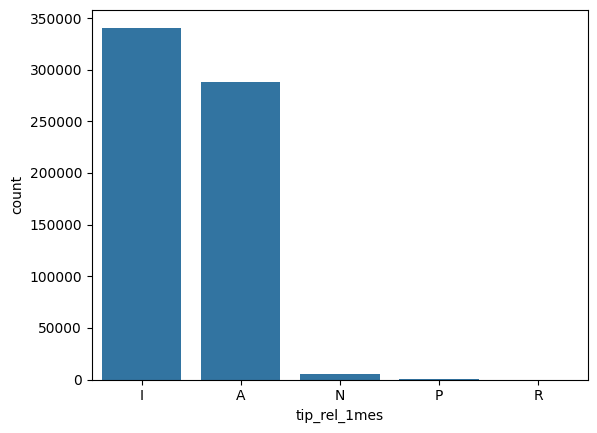

In [69]:
#Rellenamos nulos con una nueva categoria 'N'
data2['tip_rel_1mes'].fillna('N',inplace=True)
print(data2['tip_rel_1mes'].value_counts())
sns.barplot(data2['tip_rel_1mes'].value_counts())

In [70]:
dict(data2['des_canal'].value_counts())

{'KHE': 191157,
 'KAT': 152054,
 'KFC': 146716,
 'KHQ': 25773,
 'KFA': 18941,
 'KHK': 11218,
 'KHM': 7310,
 'KHD': 5456,
 'KHN': 4699,
 'KAS': 4072,
 'KAG': 3574,
 'RED': 3328,
 'KAB': 2984,
 'KAY': 2976,
 'KAA': 2931,
 'KCC': 2683,
 'KAE': 2441,
 'KHL': 2186,
 'KBZ': 2126,
 'KFD': 1844,
 'KAI': 1730,
 'KAZ': 1604,
 'KAF': 1583,
 'KAW': 1566,
 '013': 1501,
 'KEY': 1470,
 'KAR': 1338,
 'KCI': 1316,
 '007': 1255,
 'KAH': 1243,
 'KCH': 1102,
 'KAJ': 1091,
 'KHF': 959,
 'KAQ': 807,
 'KHC': 779,
 'KAP': 724,
 'KAM': 586,
 'KFP': 540,
 'KAD': 470,
 'KHO': 434,
 'KGX': 424,
 'KBH': 416,
 'KEJ': 416,
 'KAC': 415,
 'KFJ': 381,
 'KFT': 378,
 'KGV': 365,
 'KES': 331,
 'KDR': 325,
 'KAL': 322,
 'KCG': 294,
 'KFF': 262,
 'KFG': 260,
 'KFS': 244,
 'KEW': 244,
 'KAO': 234,
 'KCL': 220,
 'KBQ': 208,
 'KGY': 206,
 'KBU': 202,
 'KBO': 200,
 'KFU': 178,
 'KDT': 174,
 'KDU': 166,
 'KCM': 162,
 'KEG': 160,
 'KCB': 158,
 'KBF': 156,
 'KEN': 156,
 'KFK': 150,
 'KFH': 150,
 'KED': 138,
 'KCD': 136,
 'KFN': 13

In [71]:
data2['id_segmento'].value_counts()

id_segmento
02 - PARTICULARES     369955
03 - UNIVERSITARIO    230740
01 - TOP               26584
Name: count, dtype: int64

In [72]:
data2['mean_engagement'].median()

6.463518112854217

In [73]:
data2['imp_renta'].median()

101290.515

<Axes: ylabel='imp_renta'>

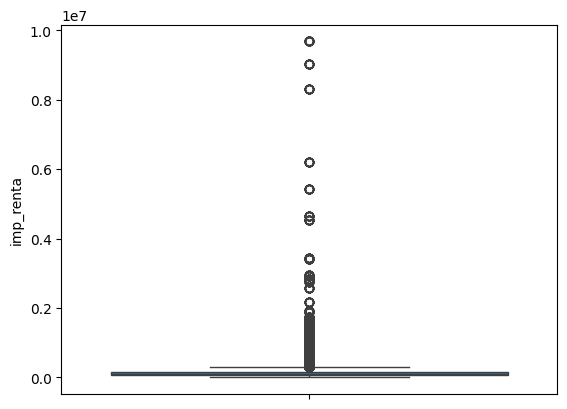

In [74]:
sns.boxplot(data2[data2['imp_renta']<1e7]['imp_renta'])

<Axes: xlabel='imp_renta', ylabel='Count'>

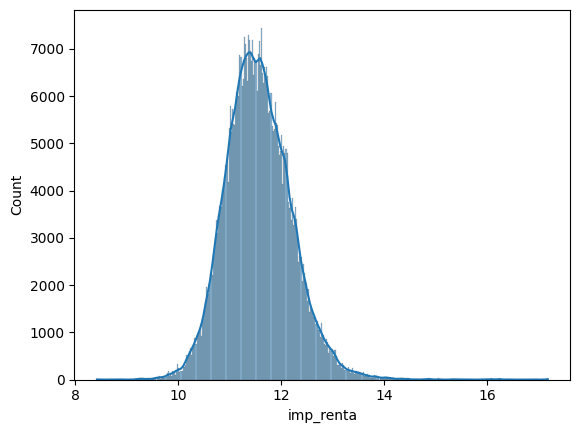

In [75]:
sns.histplot(np.log(data2['imp_renta']),kde=True)

In [76]:
#Para la columna imprenta transformamos con logaritmo para converitr a distibucion normal e imputamos con la media
data2['imp_renta']=np.log(data2['imp_renta'])
imp_imputer=SimpleImputer(strategy='mean')
data2['imp_renta']=imp_imputer.fit_transform(data2[['imp_renta']])

<Axes: xlabel='id_segmento', ylabel='count'>

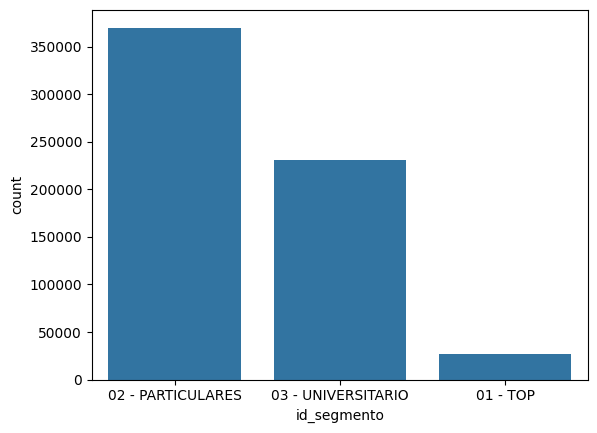

In [77]:
sns.barplot(data2['id_segmento'].value_counts())

In [78]:
#Creamos una nueva categoria '04-NO TIENE' para la columna id_segmento
data2['id_segmento'].fillna('04-NO TIENE',inplace=True)

In [79]:
data2['mean_engagement'].describe()

count    629040.000000
mean          6.425623
std           1.345879
min           0.218520
25%           5.117500
50%           6.463518
75%           7.359949
max          38.793123
Name: mean_engagement, dtype: float64

<Axes: xlabel='mean_engagement', ylabel='Count'>

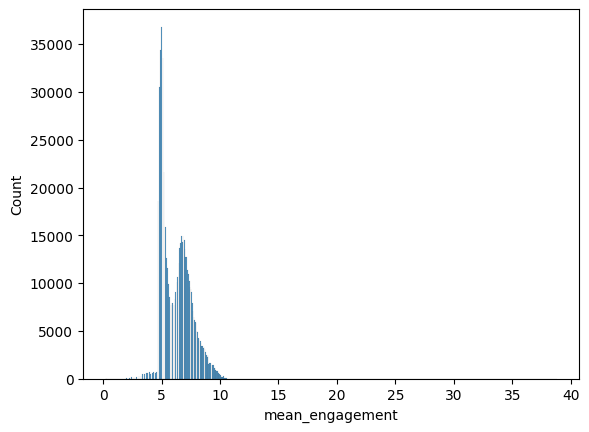

In [80]:
sns.histplot(data2['mean_engagement'])

<Axes: ylabel='mean_engagement'>

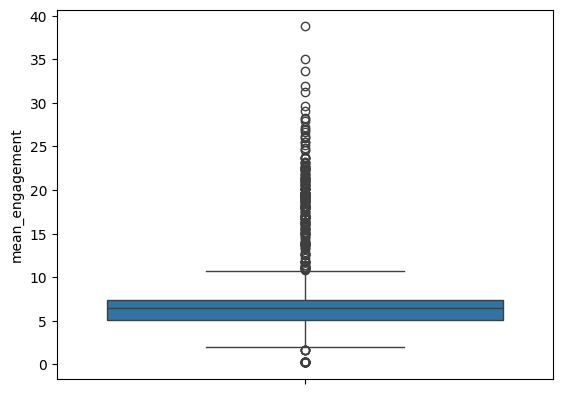

In [81]:
sns.boxplot(data2['mean_engagement'])

In [82]:
#Rellenamos con mediana, no tenemos informacion para eliminar outliers

eng_imputer=SimpleImputer(strategy='median')
data2['mean_engagement']=eng_imputer.fit_transform(data2[['mean_engagement']])

In [84]:
data2.isna().sum()

cod_persona                 0
mes                         0
pais                        0
sexo                        0
edad                        0
fecha1                     56
xti_empleado               56
xti_nuevo_cliente          56
num_antiguedad              0
xti_rel                    56
tip_rel_1mes                0
indresi                    56
indext                     56
des_canal                7178
xti_extra                  56
tip_dom                    56
cod_provincia               0
xti_actividad_cliente      56
imp_renta                   0
id_segmento                 0
mean_engagement             0
ind_prod1                   0
ind_prod2                   0
ind_prod3                   0
ind_prod4                   0
ind_prod5                   0
ind_prod6                   0
ind_prod7                   0
ind_prod8                   0
ind_prod9                   0
ind_prod10                  0
ind_prod11                  0
ind_prod12                  0
ind_prod13

In [86]:
#Rellenamos los valores de los productos con el valor anterior
data2['ind_prod22'] = data2['ind_prod22'].fillna(method='ffill')
data2['ind_prod23'] = data2['ind_prod23'].fillna(method='ffill')

## Clusterización

Hacemos clustering para tratar de sacar los valores nulos de la columna des_canal, asignando valores comunes a usuarios de clusters similares

In [87]:
data_unida_cluster=data2.copy()

In [88]:
data_unida_cluster=data_unida_cluster[~data_unida_cluster['xti_rel'].isna()]
data_unida_cluster.drop('des_canal',axis=1,inplace=True)

In [89]:
data_unida_cluster.isna().sum()

cod_persona              0
mes                      0
pais                     0
sexo                     0
edad                     0
fecha1                   0
xti_empleado             0
xti_nuevo_cliente        0
num_antiguedad           0
xti_rel                  0
tip_rel_1mes             0
indresi                  0
indext                   0
xti_extra                0
tip_dom                  0
cod_provincia            0
xti_actividad_cliente    0
imp_renta                0
id_segmento              0
mean_engagement          0
ind_prod1                0
ind_prod2                0
ind_prod3                0
ind_prod4                0
ind_prod5                0
ind_prod6                0
ind_prod7                0
ind_prod8                0
ind_prod9                0
ind_prod10               0
ind_prod11               0
ind_prod12               0
ind_prod13               0
ind_prod14               0
ind_prod15               0
ind_prod16               0
ind_prod17               0
i

In [90]:
#Método del codo
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
label_encoder = OrdinalEncoder()
data_unida_cluster['edad']=data_unida_cluster['edad'].astype(int)
data_unida_cluster.drop(['mes','fecha1'],axis=1,inplace=True)

data_unida_cluster['num_antiguedad']=data_unida_cluster['num_antiguedad'].astype(int)
cat_cols=data_unida_cluster.select_dtypes(include='O').columns

In [91]:
data_unida_cluster[cat_cols] = label_encoder.fit_transform(data_unida_cluster[cat_cols])

Para k = 2 , el coste (SSE)= 804930154.2696893
Para k = 3 , el coste (SSE)= 489408207.37251574
Para k = 4 , el coste (SSE)= 408867366.6602108
Para k = 5 , el coste (SSE)= 363939586.51913637
Para k = 6 , el coste (SSE)= 303398693.97112703
Para k = 7 , el coste (SSE)= 286667022.5301324
Para k = 8 , el coste (SSE)= 259194894.77028397
Para k = 9 , el coste (SSE)= 243107750.05892754
Para k = 10 , el coste (SSE)= 226250743.4120057


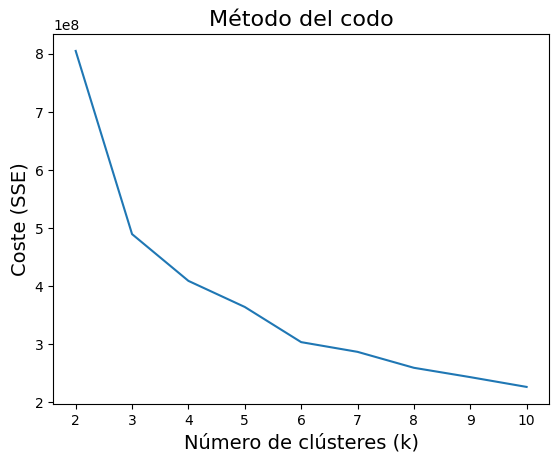

In [92]:
data_cluster=data_unida_cluster.iloc[:,:18]
data_cluster.drop('cod_persona',axis=1,inplace=True)
# Aplicar LabelEncoder a la columna 'colores'
# definimos la n-tupla donde ordenaderemos los sucesivos valores de SSE
# hallados para cada valor de k
Coste = []
krange = np.arange(2, 11) #krange = 2,3,4,5,6,7,8,9,10
# bucle para el cálculo de la función de coste (SSE) desde k= 2 hasta k= 10
for num in krange:
    kmeans = KMeans(n_clusters=num, n_init='auto', random_state=10, max_iter=100).fit(data_cluster)
    print(
        "Para k =",
        num,
        ', el coste (SSE)=',
        kmeans.inertia_,
    )
    Coste.append(kmeans.inertia_)

fig, ax = plt.subplots()
ax.set_title('Método del codo', fontsize = 16)
ax.set_ylabel("Coste (SSE)",fontsize=14)
ax.set_xlabel("Número de clústeres (k)", fontsize=14)
ax.plot(krange,Coste)
plt.show()

In [93]:
from sklearn.metrics import silhouette_samples,silhouette_score
#Importamos librerías específicas para este análsis de Silhouette
#Se ha adaptado el código https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_scores = []
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(data_unida_cluster)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_unida_cluster, cluster_labels)
    print(
        "Para k =",
        n_clusters,
        ", S =",
        silhouette_avg,
    )

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

for k in [2,3,4,5,6]:
    kmeans = KMeans(n_clusters=k, n_init= 'auto', random_state=10, max_iter=3000)
    Y_pred=kmeans.fit_predict(data_cluster) # Vector de asignación de etiquetas predichas para cada elemento
    data_cluster['id_cluster']=kmeans.labels_
    muestra=data_cluster.sample(round(0.1*len(data_cluster)))
    silhouette_avg = silhouette_score(muestra.drop('id_cluster',axis=1),muestra['id_cluster'])
    cal=calinski_harabasz_score(muestra.drop('id_cluster',axis=1),muestra['id_cluster'])
    print('\nPara un Nº de clusters: ',k ,
          '\nS: ',silhouette_avg,
          '\nCH: ',cal)
    print('-'*50)

[1 1 1 ... 0 0 0]


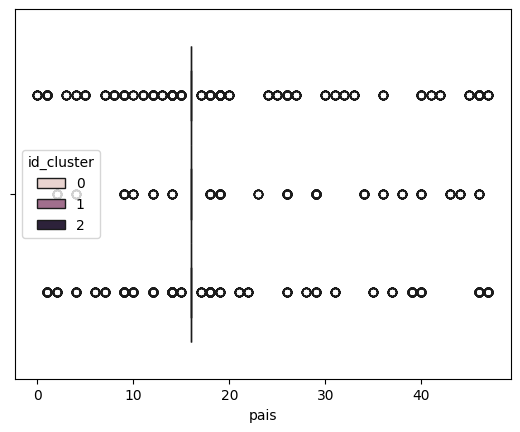

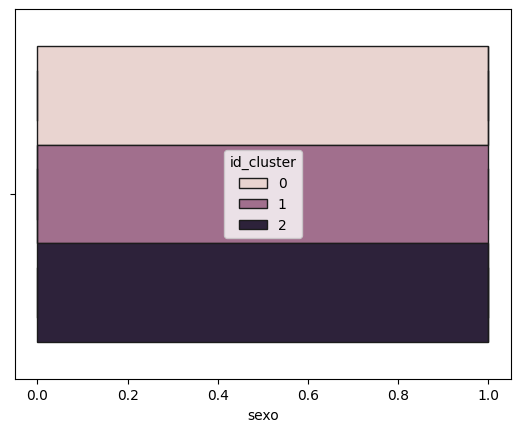

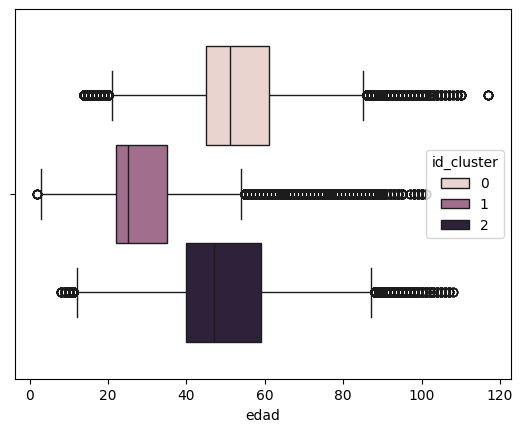

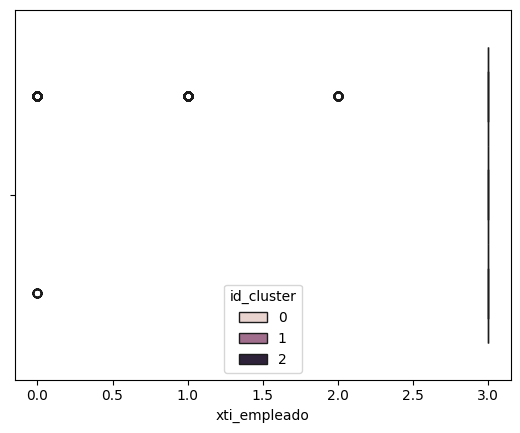

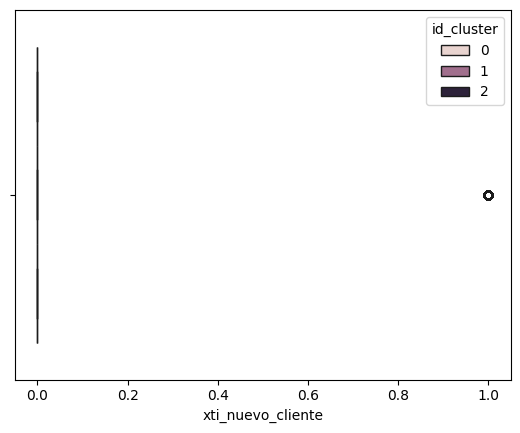

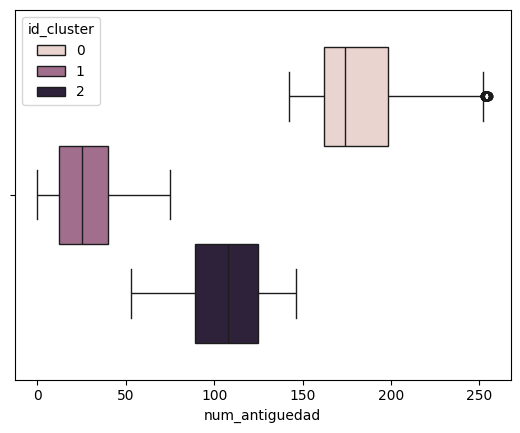

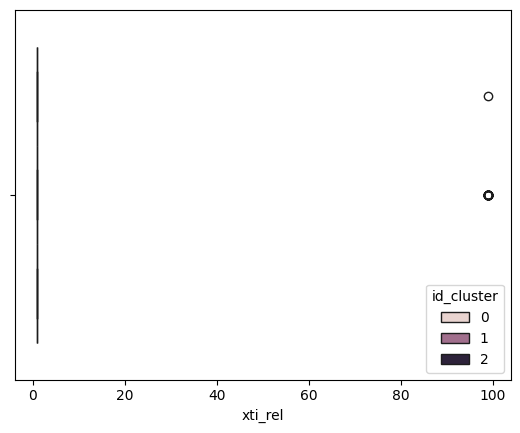

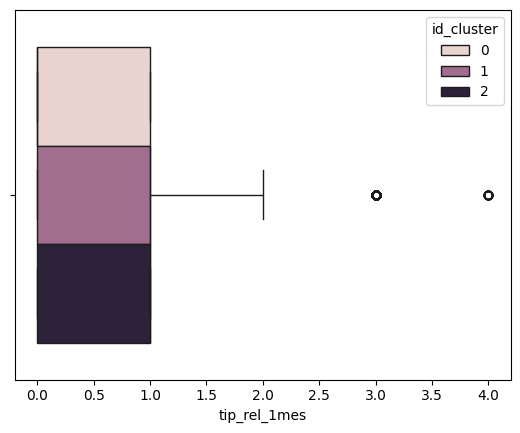

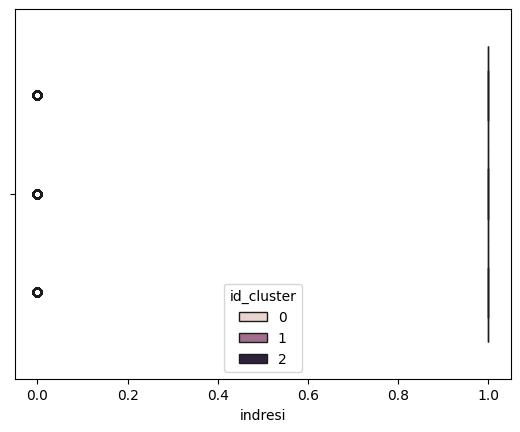

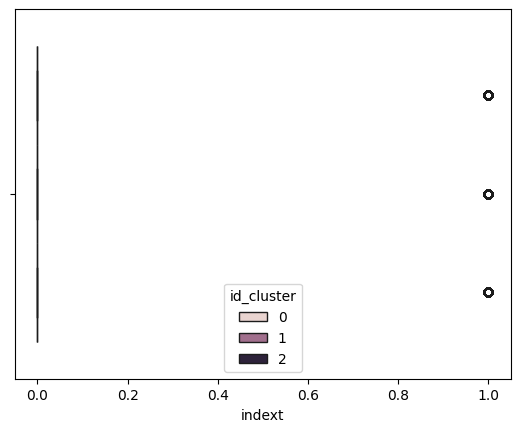

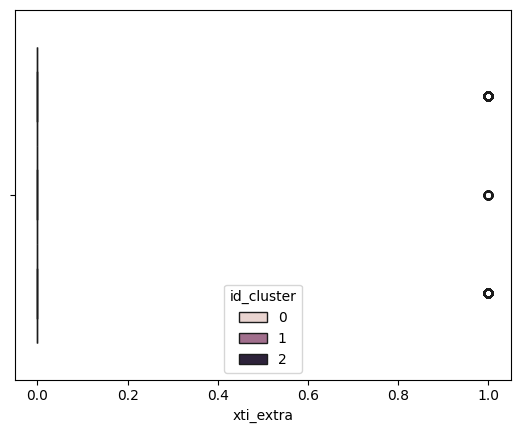

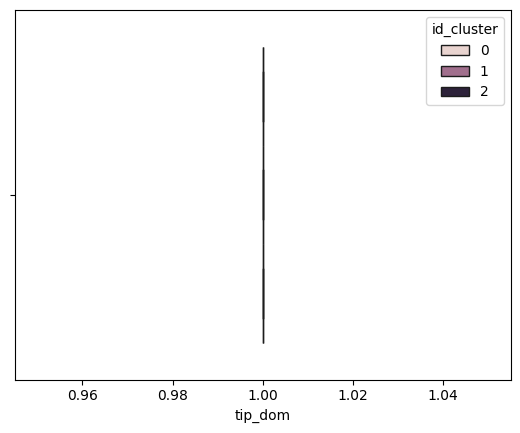

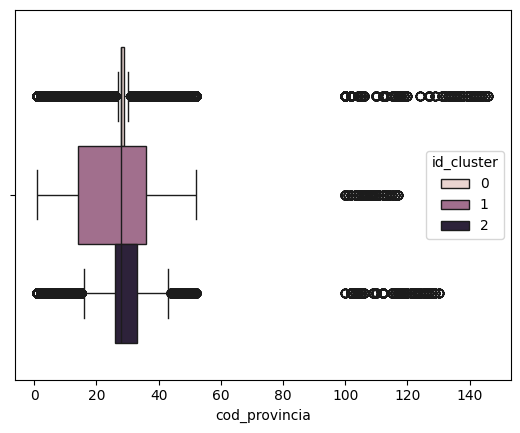

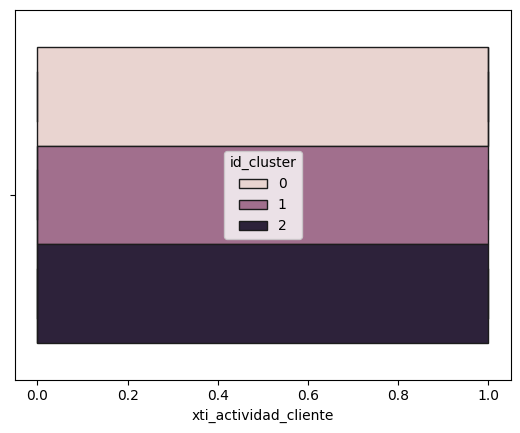

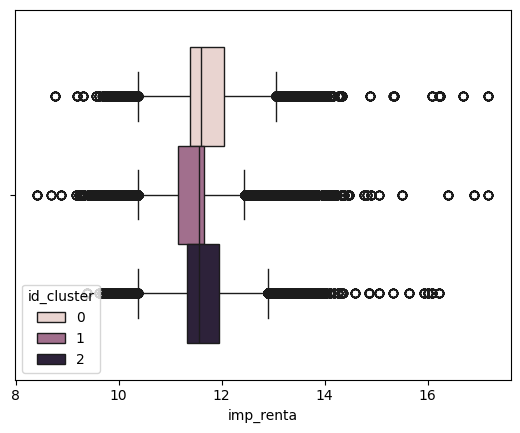

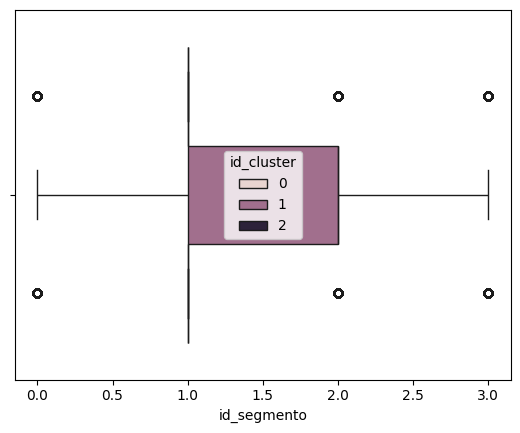

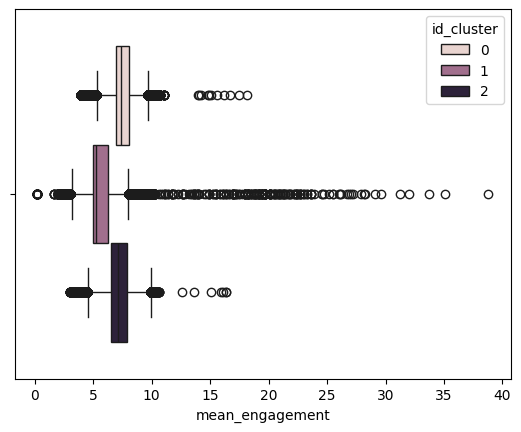

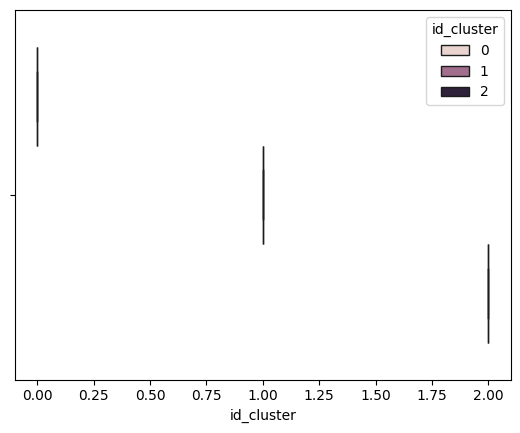

In [96]:
k_val=3
kmeans = KMeans(n_clusters=k_val, n_init= 'auto', random_state=10, max_iter=3000)
Y_pred=kmeans.fit_predict(data_cluster) # Vector de asignación de etiquetas predichas para cada elemento
print(Y_pred)
kmeans.labels_
data_cluster['id_cluster']=kmeans.labels_
#Boxplot con el comportamiento de los clusters para cada variable (Facilitar la caracterización)
for col in data_cluster.columns:
    sns.boxplot(data_cluster,x=col,hue='id_cluster')
    plt.show()

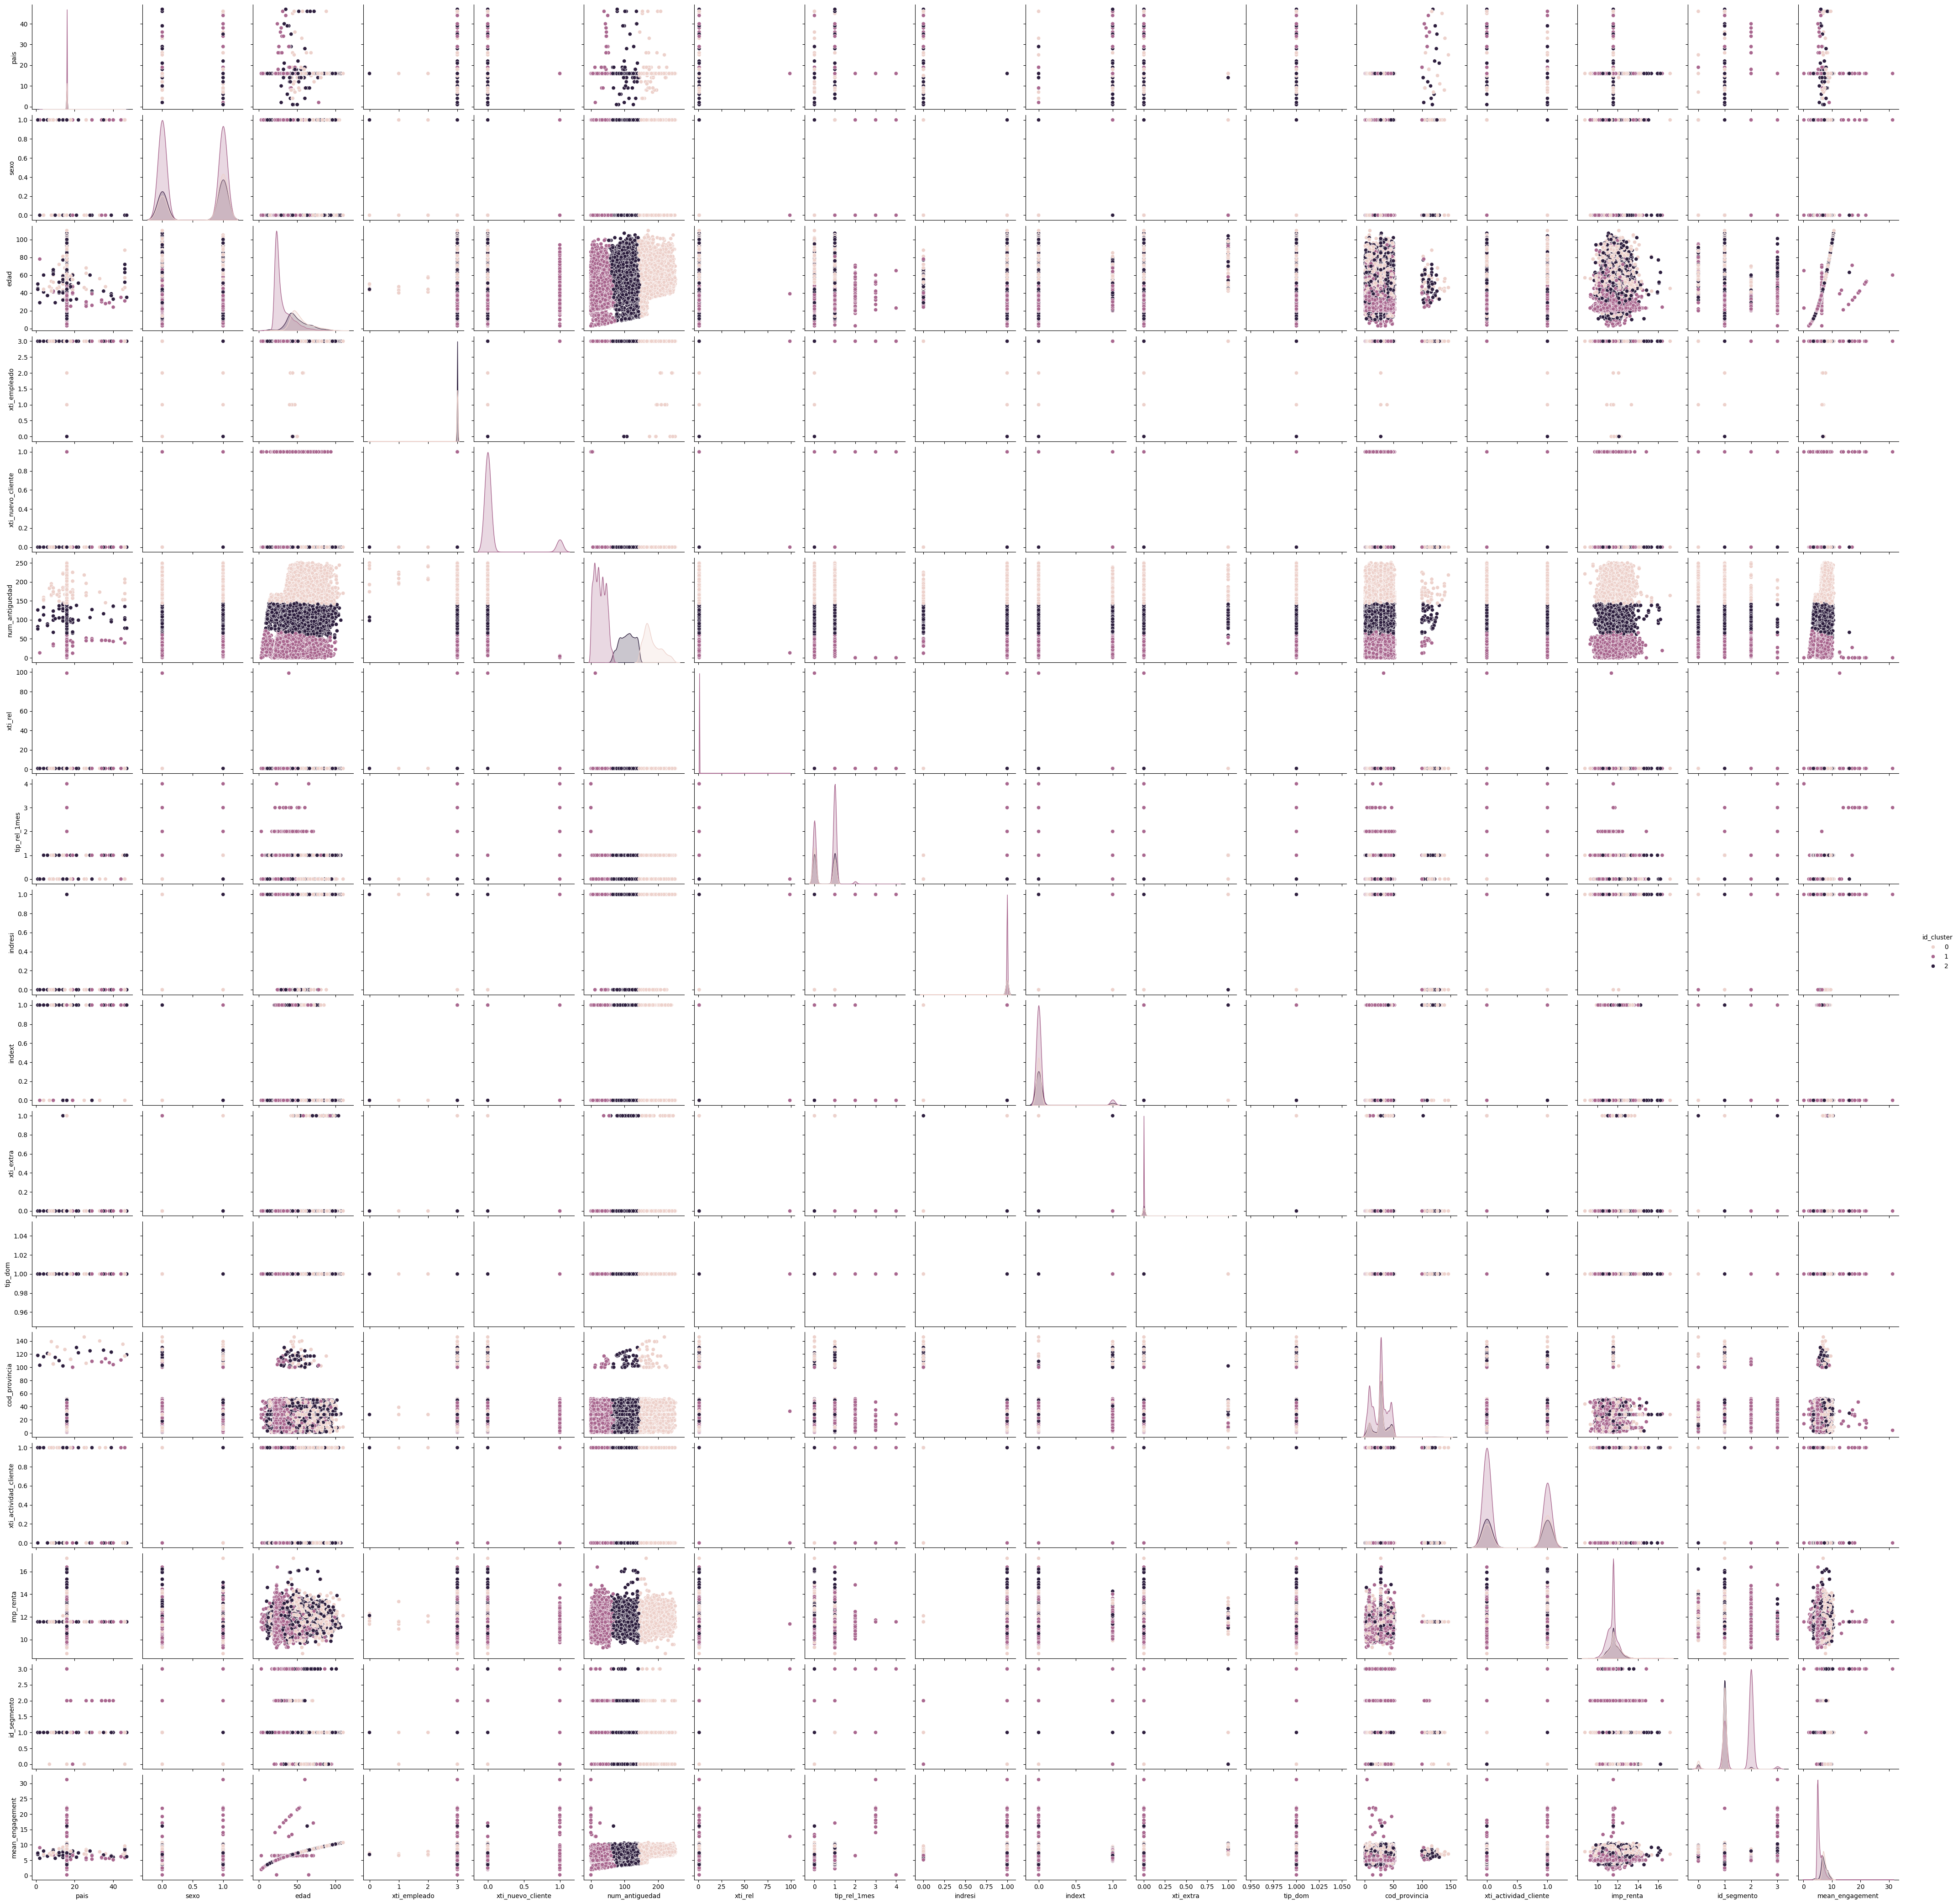

In [97]:
#gráfico pairplot sobre una submuestra
muestra=data_cluster.sample(round(0.05*len(data_cluster)))
sns.pairplot(muestra,hue='id_cluster')